# Project 2 - E2E Dialogue Model

### Goal: 
Design and train an end-to-end, task-oriented, multi-turn, generative dialogue model able to provide technical support for the Ubuntu operating system.

### Index:
1. Introduction
2. Litterature Review
3. Files and Folders - installation and description of the files and the folders in the project
4. Dataset and Data Preparation
5. Baseline model - LSTM-based  
    5.1 GRU + GRU + Attention  
    5.2 biLSTM + GRU + Attention  
6. Transformers-based model  
	  6.1 Self Attention  
	  6.2 Hierarchical Self Attention   
7. GPT2 Language Model fine-tuned
8. Evaluation of Dialogue Model
9. Inference
10. Experiments with multi-turn dialogue history
11. Conclusion
12. References
13. Acknowledgement


# 1.Introduction 
 
The advancements in deep neural networks allow us to build end-to-end dialogue models as a single system of jointly trained networks that can accomplish all the tasks necessary to generate a reply in a conversation between an user and a machine.  

We approach this task in a similar way as the machine translation task, where we read an input sequence and generate an output sequence (seq-to-seq model). 

However, we need to address several challenges: longer sequences, specific data preprocessing, and memory and computation requirements. The dialogue model has to understand and keep track of the history, which could lead to very long input sequences and cause a vanishing gradient or insufficient learning. 

We experiment with several models: LSTM-based, Transformer-based and finally we fine-tune the large language model GPT2 on our task-oriented dataset. We focus on generative dialogue models that synthesize the response by outputting probabilities over the vocabulary. We believe that generative models are more flexible and closer to human conversation because they are not limited to a set of responses as in the retrieval dialogue models.

Our results show that generative dialogue models are difficult to train and require a lot of data and computing resources. Interestingly, with the availability of large datasets and computing power, these end-to-end models are able to  replicate the utterances from the training corpus.


# 2.Litterature Review
_Task1: Conduct a literature review on end-to-end dialogue systems, specifically focusing on previous approaches with this dataset._


There are mainly two types of dialogues models:

- retrieval-based models where the network selects the most relevant response from a list of potential responses and 
- generative models where the network generates a reply to the users’s input.

In general the dialogue models are based on encoder-decoder architecture, where the encoder has to understand the dialogue context and the decoder is responsible for generating the response. Like many other tasks, the dialogue systems started as rule based, but the trend is to build end-to-end deep lerning architectures.

One of the major steps is to collect representative datasets that can be used to train neural networks for the dialogue generation task. Such large dataset was collected from the Ubuntu support forum [2]. It captures well the unstructured nature of human conversations, the multi-turn property of the dialogues, and it targets a specific domain namely the technical support. 

Several deep learning architectures have been successfully trained using this dataset. For example, in the same article the authors propose RNN and LSTM networks for the task of selecting the next best response (retrieval dialogie system). They consider contexts up to a maximum of t = 160 time steps. The RNN architecture is set to 1 hidden layer with 50 neurons and with weight matrix  initialized with orthogonal weights. They use Adam optimizer with gradients clipped to 10. For the LSTM network they applied 1 hidden layer with 200 neurons. These networks showed good results on the response retrieval task. 

The response retrieval task can be seen as an intermediate step between the slot fillingtask and utterance generation task. In slot filling, the set of candidate outputs (states) is identified a  priori through knowledge engineering. Typically this slot is a narrow set, as a result the conversation is limited.  With the response generation task the aim is to achieve more natural dialogue.

Moving forward, another end-to-end model that successfully leveraged this large unlabeled dataset is the dual encoder with LSTM hidden units [1]. The authors used 1 hidden layer with 200 neurons, a learning rate of 0.001, and a batch size of 256.

Next extension of the model architecture to better suit the generative dialogue task is the hierarchical encoder-decoder (HRED) [3]. The dialogue is considered as a sequence of utterances which, in turn can be seen as sequences of tokens. HRED models this hierarchy of sequences with two RNNs : one for the sequence of tokens  and another one for the sequence of utterances. At the first level of RNNs the hidden state obtained at the last step is the utterance vector (a continuos representation of the utterance). At the next level, the second RNN processes all the utterance vectors and obtains at the last hidden state a representation of the entire dialogue. The authors show that HRED is superior to the standard RNN. The hierarchical network seems to model better the dialogue system. 

The HRED model is further improved by latent variable neural network architecture VHRED [4]. This model was trained using a variational lower bound on the log-likelihood. The authors apply early stop with patience.  The  word embedding dimension is 300 and the hidden units for the encoder, context and decoder are 500, 1000 and 500 respectively. The learning rate is 0.0001 or 0.0002. Another hierarchical neural network is multiresolution recurrent neural network MrRNN [5] which outperforms the previous models.

We could not find in the litterature an example of Transformer-based dialogue model trained or fine-tuned on the Ubuntu corpus. In our project we conduct several experiments exploring the advantages of Transformer architecture for the generative dialogue task.

One of the recent dialogue models is Dialogue Generative Pre-trained Transformer - DialoGPT [7] trained on 147M conversation turns extracted from Reddit. It is based on pyTorch Transformer and it attends performance close to human. Transformer models when trained on large datasets can capture lexical and semantical dependencies and can closely emulate human utterances. The authors  observe that the sentences  generated by DIALOGPT are diverse and contain information  specific  to  the  source  prompt.

To further improve the relevance of the generated responses some researchers suggest leveraging reinforcement learning and also applying different loss functions like semantic loss [6]. 

Finally, evaluating the dialogue systems is a difficult problem because we have to consider synonyms and semantically equivalent phrases. Some studies [8,9,10] suggest applying metrics based on the token embeddings which we further explore in this project.


# 3.Files and folders

- hparams_base_gru.yaml: hyperparameters for the baseline dialogue model
- train_base_gru.py: training script for the first baseline model
- hparams_tokenizer.yaml: hyperparameters for Sentence Piece tokenizer
- train_tokenizer.py: training script for the tokenizer
- hparams_bilstm.yaml: hyperparametes for the model with bidirectional LSTM encoder
- train_bilstm.py:  training script for the second model
- hparams_dialogue_transformer.yaml: hyperparameters for the Transformer-based model
- train_dialogue_transformer.py: training script for the third baseline model
- hparams_gpt2.yaml : hyperparameters for fine-tuning gpt2 on ubuntu datase
- train_dialogue_gpt2.py: training script for fine-tuning gpt2 on ubuntu datase
- visualization.py: script for visualization of the results
- dialogue_evaluator.py: class for dialogue evaluation based on embedding measurements
- hyperparams.yaml - hyperparameters for inference
- dialog.py -  interface for the pretrained model
- mapping.pairs -contains symbols to be replaced when cleaning the dataset

### The data manifest files are in the main folder
- train.json
- valid.json
- test.json

### Examples of training runs:  
https://drive.google.com/drive/folders/11pCYc-NFjlvVAdslFr2WIPUALX4XeDRw?usp=share_link

### Summary of the experiments:  
https://docs.google.com/document/d/1MfpN4OGFYt-f2ZfkiluJdKBapiQp95MNbHZojwqobcs/edit?usp=share_link

### Machines used for the project:



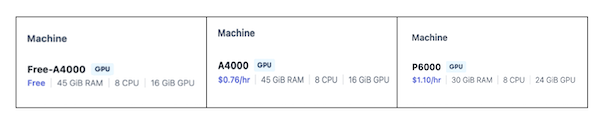

## 3.1.Install and import

In [1]:
%%capture
!pip install speechbrain
!pip install transformers
!pip install sacrebleu

In [2]:
import os
import sys
import torch
import logging
import speechbrain as sb
from hyperpyyaml import load_hyperpyyaml
import numpy as np 
import pandas as pd 
import nltk
import matplotlib.pyplot as plt
import re
import csv
import math
import sacrebleu  # sacrebleu not working on Gradient platform

In [1]:
# for convenience you can clone all the scripts for this projet from a git repository
!git clone https://github.com/mariaratcheva/ubuntudialog.git

Cloning into 'ubuntudialog'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 23 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), 27.97 KiB | 2.54 MiB/s, done.


#  4.Dataset and Data Preparation

The Ubuntu Dialogue Corpus [2] consists of one million two-person conversations extracted from the Ubuntu technical support forum which makes it suitable for task-oriented training. The style of the messages is closely correlated to natural human-to-human dialogue, however, there are a lot of special symbols and technical terms. The conversations have on average 8 turns each, with a minimum of 3 turns which helps the modelling of longer-term dependencies. The average dialogue history is 86 words long and the average utterance is 17 words long. Additional pre-processing tasks like named entity resolution have been performed to improve the model's performance. 
In the raw dataset, each line represents a turn in the conversation between speaker1 and speaker2 [Figure1]. We consider that the conversation is always initiated by the human user (speaker1) and the reply is generated by the system (speaker2) 


Figure1: Raw dataset



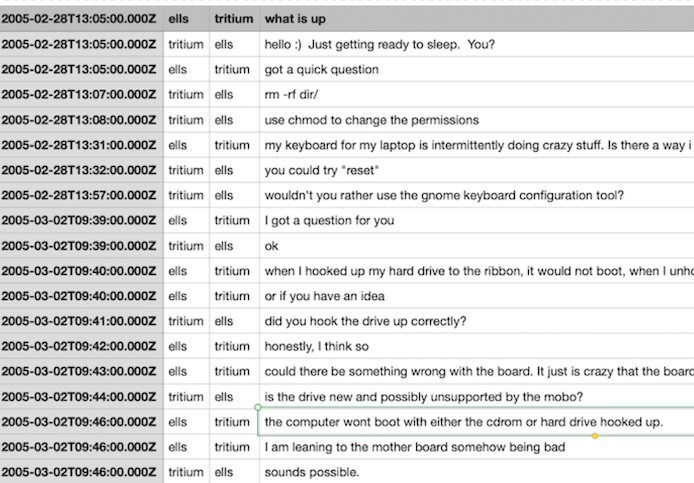

We have to represent the raw input text in a structured format that can be processed by the model. The authors chose to concatenate all consecutive utterances by the same user into one utterance and put __ EOS__ at the end (Figure2).

Figure2. Preprocesed dataset



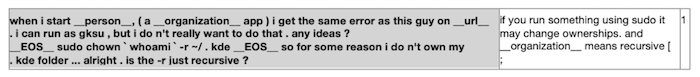

The disadvantage of this representation is that we lose track of the speaker. In the second column we always want to have the reply from the system (speaker2) so that we can train the model to play the role of speaker2.

We use the raw representation to build the **single-turn** dataset where the speaker’s turn is respected.

For the **multi-turn** dataset we go with the pre-processed dataset [2], although the reply was selected randomly and does not necessarily correspond to speaker2. We selected only the lines where the Flag is set to 1, i.e the true response.
In this case the dialogue history is represented by concatenating all the previous turns and adding the tag __EOS__ at the end of each turn. The longest sequence of the multi-turn dataset is 5038 characters and the average length of the dialogue history is 514 characters and for the reply it is 52 characters. 

In addition, we preprocessed the data to reduce the vocabulary size - removing rare symbols, some special symbols, and some non-english characters. 






## 4.1 Donwload the single-turn datasets
train dataset contains 270862 dialogues  
valid dataset contains 33857 dialogues  
test dataset contains 33859 dialogues

The data preparation scipt below will provide you with the option to select the number of dialogues in the train, valid and test dataset.

In [3]:
# download the full train, valid and test datasets
# we will use these csv files to prepare the data manifest files
!pip install --upgrade --no-cache-dir gdown
!gdown 1c-b06-l9e6RXUysIvCLow7LfxJc07bdE
!gdown 1f7Zd9MX93sYjP_8Onrnqa2kRNzZOXq7M
!gdown 1n9f8hPeR9bocUPu0BgWBu63AS_3Gcwdd
!gdown 1Y2pUHFlBeY_agRBtZV9sZ1W1nAcbP3zO

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1c-b06-l9e6RXUysIvCLow7LfxJc07bdE
To: /content/train.csv.zip
100% 22.4M/22.4M [00:00<00:00, 111MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1f7Zd9MX93sYjP_8Onrnqa2kRNzZOXq7M
To: /content/valid.csv.zip
100% 2.82M/2.82M [00:00<00:00, 194MB/s]
Downloading...
From: https://drive.google.com/uc?id=1n9f8hPeR9bocUPu0BgWBu63AS_3Gcwdd
To: /content/test.csv.zip
100% 2.83M/2.83M [00:00<00:00, 147MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Y2pUHFlBeY_agRBtZV9sZ1W1nAcbP3zO
To: /content/mapping.pair
100% 8.64k/8.64k [00:00<00:00, 10.1MB/s]


In [4]:
#%%capture
# unzip the single-turn datasets 
!unzip train.csv.zip -d data
!unzip valid.csv.zip -d data
!unzip test.csv.zip -d data

Archive:  train.csv.zip
  inflating: data/train.csv          
Archive:  valid.csv.zip
  inflating: data/valid.csv          
Archive:  test.csv.zip
  inflating: data/test.csv           


## 4.2.Data Exploration 
The max number of characters per turn for the single-turn dataset is 955.
On average we have 93 characters per turn.


In [5]:
# data exploration
import pandas as pd
df = pd.read_csv("./data/test.csv", encoding='utf-8')
df.head()

,Unnamed: 0,ID,dialogueID,turnID,history,reply
0,0,945429,10000.tsv,1,how do i get out of this annoying unity ? i ca...,sudo apt get install gnome shell . unfortuatel...
1,1,556251,10001.tsv,1,"hello everyone i have a quick question , is it...",yes
2,2,430860,100010.tsv,1,"atheros chipset , doesnt hook up . says its un...",what s your kernel version ?
3,3,838005,100012.tsv,1,"hello , i just installed ubuntu and it never a...","ubuntu uses sudo , you can still set up a root..."
4,4,386007,100026.tsv,1,maybe im a fing idiot but where is the shutdow...,sudo poweroff


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43112 entries, 0 to 43111
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  43112 non-null  int64 
 1   ID          43112 non-null  int64 
 2   dialogueID  43112 non-null  object
 3   turnID      43112 non-null  int64 
 4   history     43104 non-null  object
 5   reply       43108 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.0+ MB


In [7]:
# max number of charaters for the dialogue history and reply
print(df.history.str.len().max(), df.reply.str.len().max())

955.0 549.0


In [8]:
# average number of charaters for the dialogue history and reply
print(df.history.str.len().mean(), df.reply.str.len().mean())

93.80760486265775 56.90558597012156


## 4.3 Data Preparation

We will prepare the data manifest files in json format. 

We will perform data cleaning to eliminate or replace some characters like $ and curly brakets {}. 

the file **mapping.pair** will help us replacing some characters. 

This pre-processing will help improving the performance of the model.

The resulting file will look like this:

```
{
  "1.tsv_1": {
    "history": "also guys , i am trying to get into my firefox preferences , but it keeps telling me root . disabled = true ,",
    "reply": "are you logged in as root ?",
    "length": 109
  },
  "10.tsv_1": {
    "history": "ugh , http: and and planet . ubuntulinux . org seems to be broken ,",
    "reply": "perhaps if you define *broken* a little , we can help .",
    "length": 67
  },
  "100.tsv_1": {
    "history": "ohh to late http: and and www . ubuntulinux . org and ubuntu and login . png is so g a y",
    "reply": "easy , now",
    "length": 88
  },
  "1000.tsv_1": {
    "history": "see bug 67085 sorry , typo , ignore that . . . try this 1 bug 767085",
    "reply": "so update libc6 ?",
    "length": 68
  },
```

In [9]:
# Choose the number of dialogues to be sampled from train, valid and test
# we choose the ratio 80% - 10% - 10% 
max_dialogues_train = 30000
max_dialogues_valid = 3750
max_dialogues_test = 3750

In [10]:
# Create data manifest files in json format
import json
import re


def insertSpace(token, text):
    sidx = 0
    while True:
        sidx = text.find(token, sidx)
        if sidx == -1:
            break
        if (
            sidx + 1 < len(text)
            and re.match("[0-9]", text[sidx - 1])
            and re.match("[0-9]", text[sidx + 1])
        ):
            sidx += 1
            continue
        if text[sidx - 1] != " ":
            text = text[:sidx] + " " + text[sidx:]
            sidx += 1
        if sidx + len(token) < len(text) and text[sidx + len(token)] != " ":
            text = text[: sidx + 1] + " " + text[sidx + 1 :]
        sidx += 1
    return text

def normalize(text, replacements):
    # lower case every word
    text = text.lower()

    # replace white spaces in front and end
    text = re.sub(r"^\s*|\s*$", "", text)

    # replace st.
    text = text.replace(";", ",")
    text = re.sub("$\/", "", text)
    text = text.replace("/", " and ")

    # replace other special characters
    text = text.replace("-", " ")
    text = re.sub('["\<>@\(\)]', "", text)  # remove

    # insert white space before and after tokens:
    for token in ["?", ".", ",", "!"]:
        text = insertSpace(token, text)

    # insert white space for 's
    text = insertSpace("'s", text)

    # replace it's, does't, you'd ... etc
    text = re.sub("^'", "", text)
    text = re.sub("'$", "", text)
    text = re.sub("'\s", " ", text)
    text = re.sub("\s'", " ", text)
    text = re.sub("\\$", "", text) #remove the $ sign
    text = re.sub("{", "{{", text) #double the curly brackets
    text = re.sub("}", "}}", text)
    for fromx, tox in replacements:
        text = " " + text + " "
        text = text.replace(fromx, tox)[1:-1]

    # remove multiple spaces
    text = re.sub(" +", " ", text)

    # concatenate numbers
    tokens = text.split()
    i = 1
    while i < len(tokens):
        if re.match("^\d+$", tokens[i]) and re.match("\d+$", tokens[i - 1]):
            tokens[i - 1] += tokens[i]
            del tokens[i]
        else:
            i += 1
    text = " ".join(tokens)
    return text


def get_replacements(replacements_path: str = "mapping.pair"):
    """
    Get the replacements from a given file. Used by preprocessing.

    Arguments
    ---------
    replacements_path: str
        File containing from, to pairs, one per line.

    Returns
    -------
    replacements: List of replacements, i.e. pairs of str
        Pairs of elements used to substitute the first element with the second.
    """
    replacements = []
    with open(replacements_path, "r") as fin:
        for line in fin.readlines():
            tok_from, tok_to = line.replace("\n", "").split("\t")
            replacements.append((tok_from , tok_to))
    return replacements


# create the data-manifest files
def create_json(data_folder, input_file,  json_file, max_dialogues):
  
  def get_preprocessed(original_text, replacements):
        # apply normalization
        normalized_text = normalize(original_text, replacements)
        return normalized_text

  df = pd.read_csv(input_file, encoding='utf-8')

  # choose how many different dialogues to consider
  dialogues_list = df.dialogueID.unique()[0:max_dialogues]

  replacements = get_replacements("mapping.pair")
  json_dict = {}
  same_dialogue = ""
  
  #count dialogues
  i=0      
  
  for index, row in df[df.dialogueID.isin(dialogues_list)].iterrows():
    if same_dialogue!=row.dialogueID:
      # start new dialogue history
      history=[]
      i+=1
      if  (int(row.turnID) %2 !=0) :
        same_dialogue = row.dialogueID 
        id = same_dialogue+'_' + str(row.turnID)
        history = str(row.history)
        reply = str(row.reply)
        
        # uppercase all
        history = history.upper()
        reply = reply.upper()

        length = len(history)

        # create entry for this id
        json_dict[id] = {
                        "history": get_preprocessed(history,replacements),
                        "reply": get_preprocessed(reply,replacements),
                        "length": length,
                        } 
  
  # write the dictionary to the json file
  with open(json_file, mode="w") as json_f:
      json.dump(json_dict, json_f, indent=2)


# Set up data folder
data_folder='./data/'
tr_annotation_file= data_folder + 'train.csv'
valid_annotation_file= data_folder + 'valid.csv'
te_annotation_file= data_folder + 'test.csv'

# Create json files
create_json(data_folder, tr_annotation_file, 'train.json', max_dialogues_train)
create_json(data_folder, valid_annotation_file, 'valid.json', max_dialogues_valid)
create_json(data_folder, te_annotation_file, 'test.json', max_dialogues_test)

# 5.Baseline Model

_Task2. Implement a simple baseline in SpeechBrain using an LSTM-based encoder-decoder architecture with attention, without considering dialogue context._

We will experiment with two RNN-based seq-to-seq dialogue models using Speechbrain.

These models will generate the next utterance in a dialogue conditioned on the previous utterance. 
We approach this task as in the Machine Translation models. We use encoder-decoder models and we process arbitrary long sequences. We use a cross attention between the encoder and the decoder. The decoder is autoregressive, where the generation of a token is conditioned on previously generated tokens. 

At this point we dont look at the dialogue history.

We apply character tokenization in order to reduce the vocabulary size to 70 characters.



## 5.1 GRU + GRU + Attention
Model:  
Encoder: GRU 2 layers  
Decoder: GRU + Bahdanau's attention + beamsearch  
Tokens: Characters - CTCTextEncoder  


Our baseline model is RNN-based and includes a 2-layer GRU encoder and a 1-layer GRU decoder with Bahdanau’s attention between them. 

For the encoder, we selected the GRU architecture. Both LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) can be used as encoders, but we chose GRU because it has fewer parameters, hence it requires less memory, and fewer computational resources. It is less prone to overfitting compared to LSTM. It is also able to capture long-term dependencies. 

For the decoder, we selected the AttentionalRNNDecoder, which is an RNN decoder model with Bahdanau’s cross attention. We also selected the GRU architecture.

During validation and testing, we use beam-search to find the most likely output sequence based on the decoder output probabilities. It is suggested that large beam size leads to trivial or universal responses. We experimented with beam sizes from 3 to 16 and we observed indeed changes in the quality of the responses. Finally, we chose beam_size = 3 and eos_threshold=1.25

We chose character tokenization because of the smaller vocabulary size compared to word tokenization. Also, it gives us more flexibility when constructing words. The disadvantage is that this approach requires more computational steps as the sequences are longer. We reduced the vocabulary size with significant data preprocessing. We removed all the lines containing characters that have a frequency of less than 100 in a dataset of 10 million rows. 
 
Another issue is that we had to remove some special characters like ‘$’ and empty curly brackets {}, although they are often used in the context of ubuntu operating system.

We applied gradient clipping to fight the vanishing gradient and reduced the learning rate by learning rate annealing based on WER. We sort the batch based on the length column. Due to memory constraints we could not go to a batch size larger than 16.



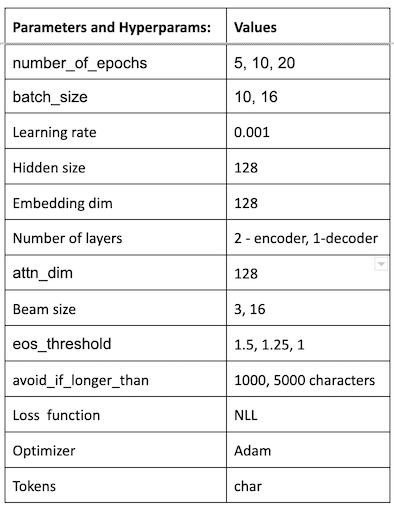

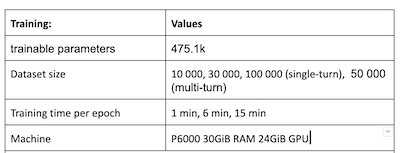

In [11]:
%%file hparams_base_gru.yaml

# ############################################################################
# Model: E2E Dialogue model - Baseline - RNN-based
# Encoder: GRU 2 layers
# Decoder: GRU + Bahdanau's attention + beamsearch
# Tokens: Characters - CTCTextEncoder
# losses: NLL
##############################################################################

# Seed needs to be set at top of yaml, before objects with parameters are instantiated
seed: 1986
__set_seed: !apply:torch.manual_seed [!ref <seed>]

# Folder set up
data_folder: !ref ./
output_folder: !ref ./results/DialogueBaseGRU/<seed>
wer_file: !ref <output_folder>/wer.txt  
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt
bleu_file: !ref <output_folder>/bleu.txt

# data files
train_json: train.json
valid_json: valid.json
test_json: test.json

# The train logger writes training statistics to a file, as well as stdout.
train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

# Training parameters
number_of_epochs: 20
batch_size: 16
lr: 0.001
max_grad_norm: 5
test_batch_size: 4
sorting: ascending
# We remove utterances longer than 1000 characters for single-turn dataset
# and 5000 characters for multi-turn dataset
avoid_if_longer_than: 5000

# Dataloader options
train_dataloader_opts:
    batch_size: !ref <batch_size>
    num_workers: 6

valid_dataloader_opts:
    batch_size: !ref <batch_size>
    num_workers: 6

test_dataloader_opts:
    batch_size: !ref <test_batch_size>
    num_workers: 6

# Vocabulary size
voc_size_history: 120 #input = history
voc_size_reply: 120  #labels = reply

# Indexes for begin-of-sentence (bos) 
# and end-of-sentence (eos)
blank_index: 0 # This special tokes is for padding
bos_index: 1
eos_index: 2
unk_index: 0

# Encoder Parameters
enc_hidden_size: 128
enc_num_layers: 2

# Decoder Parameters
dec_hidden_size: 128
dec_num_layers: 1   
attn_dim: 128
dropout: 0.5
min_decode_ratio: 0.0
max_decode_ratio: 10.0
beam_size: 32
eos_threshold: 1.5
temperature: 1.25

# Epoch Counter is saved by the Checkpointer so that training can be resumed
# if it gets interrupted at any point.
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

# Encoder
encoder: !new:speechbrain.nnet.RNN.GRU
    input_size: !ref <enc_hidden_size>
    hidden_size: !ref <enc_hidden_size>
    num_layers: !ref <enc_num_layers>
    dropout: !ref <dropout>
    re_init: True

# Encoder embeddings
encoder_emb: !new:torch.nn.Embedding
    num_embeddings: !ref <voc_size_history>
    embedding_dim: !ref <enc_hidden_size>
    padding_idx: !ref <blank_index>
    
# Attention-based RNN decoder.
decoder: !new:speechbrain.nnet.RNN.AttentionalRNNDecoder
    enc_dim: !ref <enc_hidden_size>
    input_size: !ref <dec_hidden_size>
    rnn_type: gru
    attn_type: content
    hidden_size: !ref <dec_hidden_size>
    attn_dim: !ref <attn_dim>
    num_layers: !ref <dec_num_layers>
    dropout: !ref <dropout>

# Decoder embeddings
decoder_emb: !new:torch.nn.Embedding
    num_embeddings: !ref <voc_size_history>
    embedding_dim: !ref <dec_hidden_size>
    padding_idx: !ref <blank_index>

# Linear transformation on the top of the decoder.
seq_lin: !new:speechbrain.nnet.linear.Linear
    input_size: !ref <dec_hidden_size>
    n_neurons: !ref <voc_size_reply>

# Final softmax (for log posteriors computation).
log_softmax: !new:speechbrain.nnet.activations.Softmax
    apply_log: True

# nll loss
seq_cost: !name:speechbrain.nnet.losses.nll_loss
    label_smoothing: 0.1

# Objects in "modules" dict will have their parameters moved to the correct
# device, as well as having train()/eval() called on them by the Brain class
modules:
    encoder: !ref <encoder>
    encoder_emb: !ref <encoder_emb>
    decoder: !ref <decoder>
    decoder_emb: !ref <decoder_emb>
    seq_lin: !ref <seq_lin>

# Gathering all the submodels in a single model object.
model: !new:torch.nn.ModuleList
    - - !ref <encoder>
      - !ref <encoder_emb>
      - !ref <decoder>
      - !ref <seq_lin> 
      - !ref <decoder_emb>

# Beam Searcher at inference time
beam_searcher: !new:speechbrain.decoders.S2SRNNBeamSearcher
    embedding: !ref <decoder_emb>
    decoder: !ref <decoder>
    linear: !ref <seq_lin>
    bos_index: !ref <bos_index>
    eos_index: !ref <eos_index>
    min_decode_ratio: !ref <min_decode_ratio>
    max_decode_ratio: !ref <max_decode_ratio>
    beam_size: !ref <beam_size>
    eos_threshold: !ref <eos_threshold>
    temperature: !ref <temperature>
    using_max_attn_shift: False
    max_attn_shift: 30
    coverage_penalty: 0.

# Greedy Searcher - preferred when ressources are limited
greedy_searcher: !new:speechbrain.decoders.seq2seq.S2SRNNGreedySearcher
    embedding: !ref <decoder_emb>
    decoder: !ref <decoder>
    linear: !ref <seq_lin>
    bos_index: !ref <bos_index>
    eos_index: !ref <eos_index>
    min_decode_ratio: !ref <min_decode_ratio>
    max_decode_ratio: !ref <max_decode_ratio>

# Manage learning rate annealing
lr_annealing: !new:speechbrain.nnet.schedulers.NewBobScheduler
    initial_value: !ref <lr>
    improvement_threshold: 0.0025
    annealing_factor: 0.8
    patient: 0

# Optimizer to be used by the Brain class 
opt_class: !name:torch.optim.Adam
    lr: !ref <lr>
    
# Save the state of training 
# training can be resumed if it gets interrupted 
# the best checkpoint is later loaded for evaluation or inference.
checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        model: !ref <model>
        scheduler: !ref <lr_annealing>
        counter: !ref <epoch_counter>

# performance statistics
error_rate_computer: !name:speechbrain.utils.metric_stats.ErrorRateStats

cer_computer: !name:speechbrain.utils.metric_stats.ErrorRateStats
    split_tokens: True

bleu_computer: !name:speechbrain.utils.bleu.BLEUStats
    merge_words: False

acc_computer: !name:speechbrain.utils.Accuracy.AccuracyStats


Writing hparams_base_gru.yaml


Write the training script for the baseline model.

In [13]:
%%file train_base_gru.py

"""
Seq-to-seq generative dialogue model - baseline.
The model employs an encoder, a decoder, and a Bahdanau's cross attention 
mechanism to generate the next utterance of a dialogue. 

To run this recipe, do the following:
> python train_base_GRU.py harams_base_GRU.yaml

The neural network is trained with the negative-log likelihood objective and
characters are used as basic tokens for both dialogue history and reply.
"""

import os
import sys
import torch
import logging
import speechbrain as sb
from hyperpyyaml import load_hyperpyyaml
import math

logger = logging.getLogger(__name__)


# Brain class for dialogue model training
class Dialogue(sb.Brain):
    """Class that manages the training loop."""

    def compute_forward(self, batch, stage):
        """Computations from the input representing a single dialogue turn
        to the output representing the generated reply.

        Arguments
        ---------
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.

        Returns
        -------
        predictions, inp_lens, hyps : torch.tensor
            predictions : Log-probabilities predicted by the decoder.
            inp_lens: The actual length of each input sequence
            hyps: At validation/test time, we use beamsearch to find the most likely 
            output sequence based on the decoder output probabilities.
        """
        # move the batch to the appropriate device.
        batch = batch.to(self.device)
   
        # unpack history tokens
        enc_history, inp_lens = batch.history_encoded_chars 
        
        # get the input embeddings
        enc_emb = self.modules.encoder_emb(enc_history) 

        # run the encoder
        encoder_output, _ = self.modules.encoder(enc_emb)

        # unpack reply tokens - the labels
        enc_reply_bos, reply_lens = batch.reply_encoded_chars_bos 

        # get decoding embeddings
        dec_emb = self.modules.decoder_emb(enc_reply_bos)

        # run the decoder
        decoder_outputs, _ = self.modules.decoder(dec_emb, encoder_output, inp_lens)
        
        # output layer for seq2seq log-probabilities
        # compute logits i.e., apply final linear transformation
        logits =  self.modules.seq_lin(decoder_outputs)

        # compute log posteriors
        predictions = self.hparams.log_softmax(logits)

        # generate Hypothesis for validation and test using greedy and beam search
        hyps = None
        if stage != sb.Stage.TRAIN:
          if stage == sb.Stage.VALID:
            hyps, scores = self.hparams.greedy_searcher(encoder_output, inp_lens)
          elif stage == sb.Stage.TEST:
            hyps, scores = self.hparams.beam_searcher(encoder_output, inp_lens)
           
        return predictions, inp_lens, hyps
        

    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss given the predicted and targeted outputs.
        
        Arguments
        ---------
        predictions : torch.tTensor
            The output tensor from `compute_forward`.
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.

        Returns
        -------
        loss : torch.Tensor
            A one-element tensor used for backpropagating the gradient.
        """
        current_epoch = self.hparams.epoch_counter.current
        
        predictions, inp_lens, predicted_tokens = predictions

        # unpack labels and labels with eos    
        ids = batch.id
        reply_encoded_chars_eos, reply_encoded_chars_eos_lens = batch.reply_encoded_chars_eos
        reply_encoded_chars, reply_encoded_chars_lens = batch.reply_encoded_chars

        # compute loss
        loss = self.hparams.seq_cost(predictions, 
                                     reply_encoded_chars_eos, 
                                     length=reply_encoded_chars_eos_lens)
        
        # the tokenizer is label_encoder
        if stage != sb.Stage.TRAIN:
            # Decode token terms to words
            predicted_words = [
                "".join(self.tokenizer.decode_ndim(utt_seq)).split(" ")
                for utt_seq in predicted_tokens
            ]
            target_words = [wrd.split(" ") for wrd in batch.reply]
            self.wer_metric.append(ids, predicted_words, target_words)
            self.cer_metric.append(ids, predicted_words, target_words)

        # avoid error: Loss is NaN
        eps = 1e-6
        if loss.isnan(): 
          loss=eps
          print("**LOSS IS NaN**")  

        return loss
        

    def on_stage_start(self, stage, epoch): 
        """Gets called at the beginning of each epoch""" 
        if stage != sb.Stage.TRAIN: 
            self.cer_metric = self.hparams.cer_computer() 
            self.wer_metric = self.hparams.error_rate_computer() 
            self.acc_metric = self.hparams.acc_computer()  
            self.bleu_metric = self.hparams.bleu_computer()

    def on_stage_end(self, stage, stage_loss, epoch):
        """Gets called at the end of an epoch.

        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, sb.Stage.TEST
        stage_loss : float
            The average loss for all of the data processed in this stage.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """
        # compute/store important stats
        stage_stats = {"loss": stage_loss}
        if stage == sb.Stage.TRAIN:
            self.train_stats = stage_stats
        else:
            stage_stats["CER"] = self.cer_metric.summarize("error_rate")
            stage_stats["WER"] = self.wer_metric.summarize("error_rate")
            stage_stats["SER"] = self.wer_metric.summarize("SER")
            perplexity = math.e**stage_loss
            stage_stats["perplexity"] = perplexity

        # perform end-of-iteration things, like annealing, logging, etc.
        # learning rate annealing and checkpoint are based on WER
        if stage == sb.Stage.VALID:

            old_lr, new_lr = self.hparams.lr_annealing(stage_stats["WER"])
            sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)

            self.hparams.train_logger.log_stats(
                stats_meta={"epoch": epoch, "lr": old_lr},
                train_stats=self.train_stats,
                valid_stats=stage_stats,
            )
            self.checkpointer.save_and_keep_only(
                meta={"WER": stage_stats["WER"]}, min_keys=["WER"],
            )
        elif stage == sb.Stage.TEST:
            self.hparams.train_logger.log_stats(
                stats_meta={"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stage_stats,
            )
            with open(self.hparams.wer_file, "w") as w:
                self.wer_metric.write_stats(w)


def dataio_prepare(hparams):
    # Define text processing pipeline. We start from the raw text and then
    # split it into characters. The tokens with BOS are used for feeding
    # the decoder during training (right shifr), the tokens with EOS 
    # are used for computing the cost function.
    @sb.utils.data_pipeline.takes("reply")
    @sb.utils.data_pipeline.provides(
        "reply",
        "reply_chars",
        "reply_encoded_chars_lst",
        "reply_encoded_chars",
        "reply_encoded_chars_eos",
        "reply_encoded_chars_bos",
        )
    def reply_text_pipeline(reply):
        yield reply
        reply_chars = list(reply)
        yield reply_chars
        reply_encoded_chars_lst = label_encoder.encode_sequence(reply_chars)
        yield reply_encoded_chars_lst 
        reply_encoded_chars = torch.LongTensor(reply_encoded_chars_lst)
        yield reply_encoded_chars
        reply_encoded_chars_eos = torch.LongTensor(label_encoder.append_eos_index(reply_encoded_chars_lst))
        yield reply_encoded_chars_eos                                              
        reply_encoded_chars_bos = torch.LongTensor(label_encoder.prepend_bos_index(reply_encoded_chars_lst))
        yield reply_encoded_chars_bos  

    @sb.utils.data_pipeline.takes("history")
    @sb.utils.data_pipeline.provides("history", "history_chars", "history_encoded_chars")
    def history_text_pipeline(history):
        yield history
        history_chars = list(history)
        yield history_chars
        history_encoded_chars = torch.LongTensor(input_encoder.encode_sequence(history_chars))
        yield history_encoded_chars

    # define datasets 
    datasets = {}
    data_info = {
        "train": hparams["train_json"],
        "valid": hparams["valid_json"],
        "test": hparams["test_json"],
    }
    
    input_encoder = sb.dataio.encoder.CTCTextEncoder()
    label_encoder = sb.dataio.encoder.CTCTextEncoder()

    for dataset in data_info:
        datasets[dataset] = sb.dataio.dataset.DynamicItemDataset.from_json(
            json_path=data_info[dataset],
            dynamic_items=[reply_text_pipeline, history_text_pipeline],
            output_keys=[
                "id",
                "reply",
                "reply_chars",
                "reply_encoded_chars",
                "reply_encoded_chars_eos",
                "reply_encoded_chars_bos",
                "history",
                "history_chars",
                "history_encoded_chars",
            ],
        )
        # sort by length
        if hparams["sorting"] == "ascending":
            # we sort training data to speed up training and get better results.
            datasets[dataset] = datasets[dataset].filtered_sorted(
                sort_key="length",
                key_max_value={"length": hparams["avoid_if_longer_than"]},
            )
            # when sorting do not shuffle in dataloader ! otherwise is pointless
            hparams[f"{dataset}_dataloader_opts"]["shuffle"] = False

        elif hparams["sorting"] == "descending":
            datasets[dataset] = datasets[dataset].filtered_sorted(
                sort_key="length",
                reverse=True,
                key_max_value={"length": hparams["avoid_if_longer_than"]},
            )
            # when sorting do not shuffle in dataloader ! otherwise is pointless
            hparams[f"{dataset}_dataloader_opts"]["shuffle"] = False

        elif hparams["sorting"] == "random":
              hparams[f"{dataset}_dataloader_opts"]["shuffle"] = True

        else:
            raise NotImplementedError(
                "sorting must be random, ascending or descending"
            )


    # load or compute the label encoder for inputs
    inp_enc_file = os.path.join(hparams["save_folder"], "input_encoder.txt")
    
    # blank symbol used to indicate padding
    special_labels = {"blank_label": hparams["blank_index"]}
    input_encoder.add_unk()
    input_encoder.load_or_create(
        path=inp_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="history_chars",
        special_labels=special_labels,
        sequence_input=True,
    )
        
    # load or compute the label encoder for output labels
    lab_enc_file = os.path.join(hparams["save_folder"], "label_encoder.txt")
    special_labels = {
        "blank_label": hparams["blank_index"],
        "bos_label": hparams["bos_index"],
        "eos_label": hparams["eos_index"],
    }
    label_encoder.add_unk()
    label_encoder.load_or_create(
        path=lab_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="reply_chars",
        special_labels=special_labels,
        sequence_input=True,
    )
    
    return datasets, label_encoder

if __name__ == "__main__":

    # read command line arguments
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])

    # load hyperparameters file with command-line overrides
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin, overrides)

    # create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    # create the datasets for training, valid, and test
    datasets, label_encoder = dataio_prepare(hparams)

    # trainer initialization
    dialogue_brain = Dialogue(
        modules=hparams["modules"],
        opt_class=hparams["opt_class"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )
    
    # making label encoder accessible (needed for computing the character/word error rate)
    dialogue_brain.tokenizer = label_encoder

    # training
    dialogue_brain.fit(
          dialogue_brain.hparams.epoch_counter,
          datasets["train"],
          datasets["valid"],
          train_loader_kwargs=hparams["train_dataloader_opts"],
          valid_loader_kwargs=hparams["valid_dataloader_opts"],
      )

    # save the WER file
    dialogue_brain.hparams.wer_file = hparams["output_folder"] + "/wer.txt"

    # load best checkpoint for evaluation
    test_stats = dialogue_brain.evaluate(
        test_set=datasets["test"],
        min_key="WER",
        test_loader_kwargs=hparams["test_dataloader_opts"],
    )


Overwriting train_base_gru.py


### run train_base_gru.py
Baseline model on single-turn dataset

In [ ]:
#!rm -rf ./results/DialogueBaseGRU/1986
#!zip -r DialogueBaseGRU.zip ./results/DialogueBaseGRU

In [ ]:
!python train_base_gru.py hparams_base_gru.yaml --number_of_epochs=5 --device='cuda:0' --data_folder="./"

speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: ./results/DialogueBaseGRU/1986
speechbrain.dataio.encoder - Load called, but CTCTextEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.dataio.encoder - Load called, but CTCTextEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.dataio.encoder - Load called, but CTCTextEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.dataio.encoder - Load called, but CTCTextEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - Info: max_grad_norm arg from hparam file is used
speechbrain.core - 475.1k trainable parameters in Dialogue
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dat

### Visualization

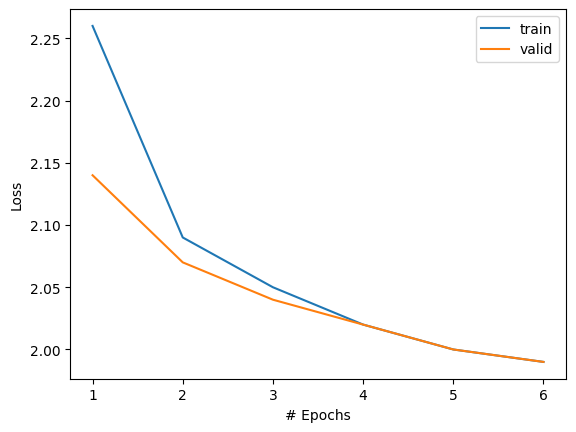

In [ ]:
import matplotlib.pyplot as plt

def get_losses(log_file):
  """This function takes in input a path of a log-file and outputs the train and
  valid losses in lists of float numbers"""

  x_epochs_list =[]
  train_loss_list = []
  valid_loss_list = []
  wer_list=[]
  with open(log_file) as f:
    lines=f.readlines()
    result=[]
    for x in lines:
        if x.split(' ')[0] != 'Epoch':
          x_epochs_list.append(int(x.split(' ')[1].split(',')[0]))
          train_loss_list.append(float((x.split(' ')[7])))
          valid_loss_list.append(float(x.split(' ')[11].split(',')[0]))
          wer_list.append(float(x.split(' ')[17].split(',')[0]))

  return x_epochs_list, train_loss_list, valid_loss_list, wer_list

log_file = 'results/DialogueBaseGRU/1986/train_log.txt'
x_epochs, train_losses, valid_losses, wer = get_losses(log_file)

default_x_ticks = range(len(x_epochs))
plt.plot(default_x_ticks, train_losses, label='train')
plt.plot(default_x_ticks, valid_losses, label='valid')
plt.xticks(default_x_ticks, x_epochs)
plt.ylabel('Loss')
plt.xlabel('# Epochs')
plt.legend()
plt.show()

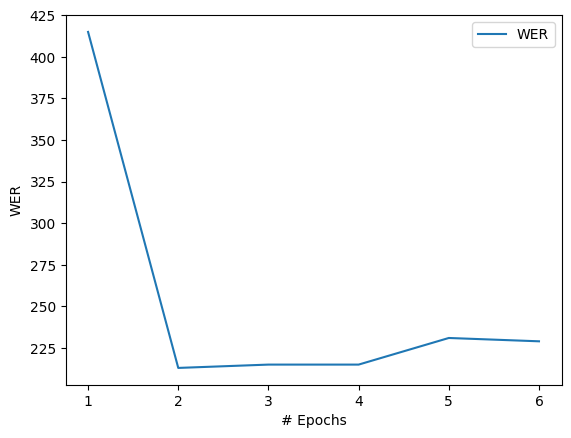

In [ ]:
default_x_ticks = range(len(x_epochs))
plt.plot(default_x_ticks, wer, label='WER')
plt.xticks(default_x_ticks, x_epochs)
plt.ylabel('WER')
plt.xlabel('# Epochs')
plt.legend()
plt.show()

### Conclusion

Conclusion: The model is able to generate semantically correct replies, however, it seems to pick up frequent responses or universal responses. It seems that the seq2seq encoder-decoder architecture has difficulties generating diverse responses. This architecture might be more suitable for more narrow task-oriented dialogue - like hotel reservations. The decoder needs more guidance when mapping the input utterance to an output reply.

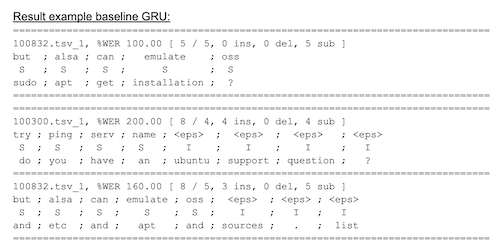

## 5.2 biLSTM + GRU + Attention 

This time we use Sentence Piece tokenizer

We train two tokenizers: 
- one for the input  and 
- another one for the output 

Model:
Encoder: biLSTM  2 layers  
Decoder: GRU 3 layers + Bahdanau's attention + beamsearch  
Tokens: Characters - char, uni, bpe - SentencePiece  


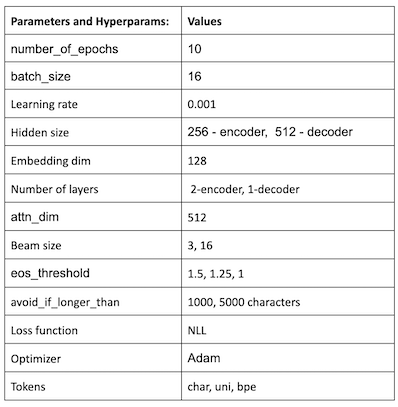

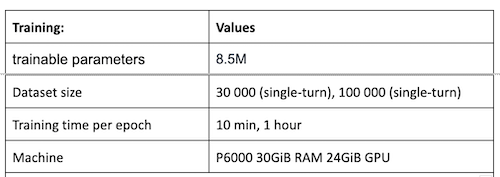

### Train Tokenizers

In [14]:
%%file hparams_tokenizer.yaml

output_folder: !PLACEHOLDER
annotation_read: !PLACEHOLDER
annotation_file: "train.json"
vocab_size: 70

tokenizer: !name:speechbrain.tokenizers.SentencePiece.SentencePiece
   model_dir: !ref <output_folder>
   vocab_size: !ref <vocab_size>
   annotation_train: !ref <annotation_file>
   annotation_read: !ref <annotation_read>
   annotation_format : "json"
   model_type: "bpe"

Writing hparams_tokenizer.yaml


In [15]:
%%file train_tokenizer.py

#!/usr/bin/env/python3
import sys
import speechbrain as sb
from hyperpyyaml import load_hyperpyyaml
from speechbrain.utils.distributed import run_on_main

if __name__ == "__main__":

    # CLI:
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin, overrides)

    # Create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    # Train tokenizer
    hparams["tokenizer"]()

Writing train_tokenizer.py


In [ ]:
!python train_tokenizer.py hparams_tokenizer.yaml --output_folder='results/tokenizer/history/' --annotation_read='history'
!python train_tokenizer.py hparams_tokenizer.yaml --output_folder='results/tokenizer/reply/' --annotation_read='reply'

speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: results/tokenizer/history/
speechbrain.tokenizers.SentencePiece - Train tokenizer with type:bpe
speechbrain.tokenizers.SentencePiece - Extract history sequences from:train.json
speechbrain.tokenizers.SentencePiece - Text file created at: results/tokenizer/history/train.txt
sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=results/tokenizer/history/train.txt --model_prefix=results/tokenizer/history/70_bpe --model_type=bpe --bos_id=-1 --eos_id=-1 --pad_id=-1 --unk_id=0 --max_sentencepiece_length=10 --character_coverage=1.0 --add_dummy_prefix=True --vocab_size=70
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: results/tokenizer/history/train.txt
  input_format: 
  model_prefix: results/tokenizer/history/70_bpe
  model_type: BPE
  vocab_size: 70
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sent

### Train Model  

In [16]:
%%file hparams_bilstm.yaml

# ############################################################################
# Model: E2E Dialogue model - RNN-based
# Encoder: biLSTM 2 layers
# Decoder: GRU 3 layers + Bahdanau's attention + beamsearch
# Tokens: char, uni - SentencePiece
# losses: NLL
##############################################################################

# Seed needs to be set at top of yaml, before objects with parameters are made
seed: 1986
__set_seed: !apply:torch.manual_seed [!ref <seed>]
output_folder: !ref results/DialogueBaseBiLSTM/
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

# Data files
train_json: train.json
valid_json: valid.json
test_json: test.json

tokenizer_history_file: ./results/tokenizer/history/70_bpe.model
tokenizer_reply_file: ./results/tokenizer/reply/70_bpe.model

# Training parameters
number_of_epochs: 10
batch_size: 16
lr: 0.001


# Model params
emb_size: 128
dec_neurons: 512
output_neurons: 70   #vocabulary size
encoder_dim: 256

# Decoding parameters
bos_index: 0
eos_index: 0
min_decode_ratio: 0.0
max_decode_ratio: 10.0
slu_beam_size: 16
eos_threshold: 1.25
temperature: 1.25

dataloader_opts:
    batch_size: !ref <batch_size>
    shuffle: True

epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>


encoder: !new:speechbrain.nnet.containers.Sequential
    input_shape: [null, null, !ref <emb_size>]
    lstm: !new:speechbrain.nnet.RNN.LSTM
        input_size: !ref <emb_size>
        bidirectional: True
        hidden_size: !ref <encoder_dim>
        num_layers: 2
    linear: !new:speechbrain.nnet.linear.Linear
        input_size: !ref <encoder_dim> * 2
        n_neurons: !ref <encoder_dim>

input_emb: !new:speechbrain.nnet.embedding.Embedding
    num_embeddings: !ref <output_neurons>
    embedding_dim: !ref <emb_size>

output_emb: !new:speechbrain.nnet.embedding.Embedding
    num_embeddings: !ref <output_neurons>
    embedding_dim: !ref <emb_size>

dec: !new:speechbrain.nnet.RNN.AttentionalRNNDecoder
    enc_dim: !ref <encoder_dim>
    input_size: !ref <emb_size>
    rnn_type: gru
    attn_type: content
    hidden_size: !ref <dec_neurons>
    attn_dim: 512
    num_layers: 3
    scaling: 1.0
    dropout: 0.0

seq_lin: !new:speechbrain.nnet.linear.Linear
    input_size: !ref <dec_neurons>
    n_neurons: !ref <output_neurons>

modules:
    encoder: !ref <encoder>
    input_emb: !ref <input_emb>
    output_emb: !ref <output_emb>
    dec: !ref <dec>
    seq_lin: !ref <seq_lin>

model: !new:torch.nn.ModuleList
    - [!ref <encoder>, !ref <input_emb>, !ref <output_emb>,
       !ref <dec>, !ref <seq_lin>]

tokenizer_reply: !new:sentencepiece.SentencePieceProcessor
tokenizer_history: !new:sentencepiece.SentencePieceProcessor

pretrainer: !new:speechbrain.utils.parameter_transfer.Pretrainer
    collect_in: !ref <save_folder>/tokenizers
    loadables:
        tokenizer_reply: !ref <tokenizer_reply>
        tokenizer_history: !ref <tokenizer_history>
    paths:
        tokenizer_reply: !ref <tokenizer_reply_file>
        tokenizer_history: !ref <tokenizer_history_file>

beam_searcher: !new:speechbrain.decoders.S2SRNNBeamSearcher
    embedding: !ref <output_emb>
    decoder: !ref <dec>
    linear: !ref <seq_lin>
    bos_index: !ref <bos_index>
    eos_index: !ref <eos_index>
    min_decode_ratio: !ref <min_decode_ratio>
    max_decode_ratio: !ref <max_decode_ratio>
    beam_size: !ref <slu_beam_size>
    eos_threshold: !ref <eos_threshold>
    temperature: !ref <temperature>
    using_max_attn_shift: False
    max_attn_shift: 30
    coverage_penalty: 0.

opt_class: !name:torch.optim.Adam
    lr: !ref <lr>

lr_annealing: !new:speechbrain.nnet.schedulers.NewBobScheduler
    initial_value: !ref <lr>
    improvement_threshold: 0.0025
    annealing_factor: 0.8
    patient: 0


checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        model: !ref <model>
        scheduler: !ref <lr_annealing>
        counter: !ref <epoch_counter>
        
log_softmax: !new:speechbrain.nnet.activations.Softmax
    apply_log: True

seq_cost: !name:speechbrain.nnet.losses.nll_loss
    label_smoothing: 0.1

train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

error_rate_computer: !name:speechbrain.utils.metric_stats.ErrorRateStats

cer_computer: !name:speechbrain.utils.metric_stats.ErrorRateStats
    split_tokens: True

Writing hparams_bilstm.yaml


The training script for the second baseline model train_bilstm.py

In [17]:
%%file train_bilstm.py

import os
import sys
import torch
import logging
import speechbrain as sb
from speechbrain.utils.distributed import run_on_main
from hyperpyyaml import load_hyperpyyaml
from pathlib import Path
import math

logger = logging.getLogger(__name__)


# Define training procedure
class DialogueBase(sb.Brain):
    
    
    def compute_forward(self, batch, stage):
        """Computations from input history to semantic outputs"""
        
        # We first move the batch to the appropriate device.
        batch = batch.to(self.device)
        
        # unpack history tokens
        history_tokens, history_tokens_lens = batch.history_tokens
        
        # get the input embeddings 
        embedded_history = self.modules.input_emb(history_tokens)

        # run the encoder
        encoder_output = self.modules.encoder(embedded_history)

        # unpack reply tokens - the labels
        reply_tokens_bos, reply_tokens_bos_lens = batch.reply_tokens_bos

        # get decoding embeddings
        dec_emb = self.modules.output_emb(reply_tokens_bos)

        # run the decoder
        decoder_outputs, _ = self.modules.dec(dec_emb, encoder_output, history_tokens_lens)

        # Output layer for seq2seq log-probabilities
        # Compute logits (i.e., apply final linear transformation)
        logits = self.modules.seq_lin(decoder_outputs)

        # Compute log posteriors - predictions
        p_seq = self.hparams.log_softmax(logits)

        # Compute outputs
        if (stage == sb.Stage.TRAIN):
            return p_seq, history_tokens_lens
        else:
            # use beam search to generate the hypothesis - the most likely 
            # output sequence based on the decoder output probabilities
            p_tokens, scores = self.hparams.beam_searcher(
                encoder_output, history_tokens_lens
            )
            return p_seq, history_tokens_lens, p_tokens

    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss given predictions and targets."""

        current_epoch = self.hparams.epoch_counter.current
        if stage == sb.Stage.TRAIN:
            p_seq, history_tokens_lens = predictions
        else:
            p_seq, history_tokens_lens, predicted_tokens = predictions
        
        # unpacking labels
        ids = batch.id
        reply_tokens_eos, reply_tokens_eos_lens = batch.reply_tokens_eos
        reply_tokens, reply_tokens_lens = batch.reply_tokens

        # compute loss
        loss = self.hparams.seq_cost(p_seq, reply_tokens_eos, length=reply_tokens_eos_lens)

        if stage != sb.Stage.TRAIN:
            # Decode token terms to words
            predicted_words = [
                self.tokenizer_reply.decode_ids(utt_seq).split(" ")
                for utt_seq in predicted_tokens
            ]
            target_words = [wrd.split(" ") for wrd in batch.reply]
            self.wer_metric.append(ids, predicted_words, target_words)
            self.cer_metric.append(ids, predicted_words, target_words)
            perplexity = math.e**stage_loss
            stage_stats["perplexity"] = perplexity

        return loss

    def fit_batch(self, batch):
        """Train the parameters given a single batch in input"""
        predictions = self.compute_forward(batch, sb.Stage.TRAIN)
        loss = self.compute_objectives(predictions, batch, sb.Stage.TRAIN)
        loss.backward()
        if self.check_gradients(loss):
            self.optimizer.step()
        self.optimizer.zero_grad()
        return loss.detach()

    def evaluate_batch(self, batch, stage):
        """Computations needed for validation/test batches"""
        predictions = self.compute_forward(batch, stage=stage)
        with torch.no_grad():
            loss = self.compute_objectives(predictions, batch, stage=stage)
        return loss.detach()

    def on_stage_start(self, stage, epoch):
        """Gets called at the beginning of each epoch"""
        if stage != sb.Stage.TRAIN:
            self.cer_metric = self.hparams.cer_computer()
            self.wer_metric = self.hparams.error_rate_computer()

    def on_stage_end(self, stage, stage_loss, epoch):
        """Gets called at the end of a epoch."""
        # compute stats
        stage_stats = {"loss": stage_loss}
        if stage == sb.Stage.TRAIN:
            self.train_stats = stage_stats
        else:
            stage_stats["CER"] = self.cer_metric.summarize("error_rate")
            stage_stats["WER"] = self.wer_metric.summarize("error_rate")
            stage_stats["SER"] = self.wer_metric.summarize("SER")

        # perform end-of-iteration things, like annealing, logging, etc.
        if stage == sb.Stage.VALID:

            # update learning rate
            old_lr, new_lr = self.hparams.lr_annealing(stage_stats["WER"])
            sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)

            # update learning rate
            #old_lr, new_lr = self.hparams.lr_annealing(epoch)
            #sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)
            
            # update learning rate
            #old_lr, new_lr = self.hparams.lr_annealing(stage_stats["loss"])
            #sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)

            self.hparams.train_logger.log_stats(
                stats_meta={"epoch": epoch, "lr": old_lr},
                train_stats=self.train_stats,
                valid_stats=stage_stats,
            )

            # save checkpoint
            #self.checkpointer.save_and_keep_only(
            #    meta={"SER": stage_stats["SER"]}, min_keys=["SER"],
            #)

            # save the current checkpoint and delete previous checkpoints.
            self.checkpointer.save_and_keep_only(
                meta={"loss": stage_stats["loss"]}, min_keys=["loss"],
            )
            
        elif stage == sb.Stage.TEST:
            self.hparams.train_logger.log_stats(
                stats_meta={"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stage_stats,
            )
            with open(self.hparams.wer_file, "w") as w:
                self.wer_metric.write_stats(w)


def dataio_prepare(hparams):
    """This function prepares the datasets to be used in the brain class.
    It also defines the data processing pipeline through user-defined functions."""
    # 1. Declarations:

    train_data = sb.dataio.dataset.DynamicItemDataset.from_json(
        json_path=hparams["train_json"],
        #replacements = replacements_all
    )

    valid_data = sb.dataio.dataset.DynamicItemDataset.from_json(
        json_path=hparams["valid_json"],
        #replacements = replacements_all
    )
  
    test_data = sb.dataio.dataset.DynamicItemDataset.from_json(
        json_path=hparams["test_json"],
        #replacements = replacements_all
    )
 
    datasets = [train_data, valid_data, test_data]

    # We get the tokenizers as we need them to encode the labels and the input when creating mini-batches
    tokenizer_history = hparams["tokenizer_history"]
    tokenizer_reply = hparams["tokenizer_reply"]

    # 2. Define input pipeline:
    @sb.utils.data_pipeline.takes("history")
    @sb.utils.data_pipeline.provides("history", "history_tokens")
    def history_pipeline(history):
        yield history
        history_tokens_list = tokenizer_history.encode_as_ids(history)
        history_tokens = torch.LongTensor(history_tokens_list)
        yield history_tokens

    sb.dataio.dataset.add_dynamic_item(datasets, history_pipeline)

    # 3. Define output pipeline:
    @sb.utils.data_pipeline.takes("reply")
    @sb.utils.data_pipeline.provides(
        "reply",
        "reply_tokens_list",
        "reply_tokens_bos",
        "reply_tokens_eos",
        "reply_tokens",
    )
    def reply_pipeline(reply):
        yield reply
        reply_tokens_list = tokenizer_reply.encode_as_ids(reply)
        yield reply_tokens_list
        reply_tokens_bos = torch.LongTensor(
            [hparams["bos_index"]] + (reply_tokens_list)
        )
        yield reply_tokens_bos
        reply_tokens_eos = torch.LongTensor(
            reply_tokens_list + [hparams["eos_index"]]
        )
        yield reply_tokens_eos
        reply_tokens = torch.LongTensor(reply_tokens_list)
        yield reply_tokens

    sb.dataio.dataset.add_dynamic_item(datasets, reply_pipeline)

    # 4. Set output:
    sb.dataio.dataset.set_output_keys(
        datasets,
        [
            "id",
            "history",
            "history_tokens",
            "reply",
            "reply_tokens_bos",
            "reply_tokens_eos",
            "reply_tokens",
        ],
    )

    return (
        train_data,
        valid_data,
        test_data
    )


if __name__ == "__main__":

    # CLI:
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])

    # Load hparams with command-line overrides
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin, overrides)

    # Create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    # here we create the datasets objects as well as tokenization and encoding
    (
        train_set,
        valid_set,
        test_set,
    ) = dataio_prepare(hparams)


    # We download the pretrained ASR from HuggingFace (or elsewhere depending on
    # the path given in the YAML file). The tokenizer is loaded at the same time.
    run_on_main(hparams["pretrainer"].collect_files)
    hparams["pretrainer"].load_collected(device=run_opts["device"])

    # Trainer initialization
    dialogue_brain = DialogueBase(
        modules=hparams["modules"],
        opt_class=hparams["opt_class"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )

    # We dynamicaly add the tokenizer to our brain class.
    dialogue_brain.tokenizer_history = hparams["tokenizer_history"]
    dialogue_brain.tokenizer_reply = hparams["tokenizer_reply"]

    # Training
    dialogue_brain.fit(
        dialogue_brain.hparams.epoch_counter,
        train_set,
        valid_set,
        train_loader_kwargs=hparams["dataloader_opts"],
        valid_loader_kwargs=hparams["dataloader_opts"],
    )

    # save the WER file
    dialogue_brain.hparams.wer_file = hparams["output_folder"] + "/wer.txt"

    # Testing
    dialogue_brain.evaluate(
        test_set,
        min_key="loss",
        test_loader_kwargs=hparams["dataloader_opts"],
    )

Writing train_bilstm.py


#### run train_bilstm.py

In [ ]:
#!rm -rf ./results/DialogueBaseBiLSTM/1986/
#!zip -r results_DialogueBaseBiLSTM.zip ./results/DialogueBaseBiLSTM

updating: results/DialogueBaseBiLSTM/ (stored 0%)
  adding: results/DialogueBaseBiLSTM/log.txt (deflated 91%)
  adding: results/DialogueBaseBiLSTM/wer.txt (deflated 88%)
  adding: results/DialogueBaseBiLSTM/train_log.txt (deflated 56%)
  adding: results/DialogueBaseBiLSTM/train_bilstm.py (deflated 73%)
  adding: results/DialogueBaseBiLSTM/env.log (deflated 52%)
  adding: results/DialogueBaseBiLSTM/.ipynb_checkpoints/ (stored 0%)
  adding: results/DialogueBaseBiLSTM/.ipynb_checkpoints/wer-checkpoint.txt (deflated 88%)
  adding: results/DialogueBaseBiLSTM/save/ (stored 0%)
  adding: results/DialogueBaseBiLSTM/save/tokenizers/ (stored 0%)
  adding: results/DialogueBaseBiLSTM/save/tokenizers/tokenizer_history.ckpt (deflated 42%)
  adding: results/DialogueBaseBiLSTM/save/tokenizers/tokenizer_reply.ckpt (deflated 42%)
  adding: results/DialogueBaseBiLSTM/save/CKPT+2023-04-16+03-38-08+00/ (stored 0%)
  adding: results/DialogueBaseBiLSTM/save/CKPT+2023-04-16+03-38-08+00/CKPT.yaml (deflated 5%)

In [ ]:
!python train_bilstm.py hparams_bilstm.yaml --number_of_epochs=20 --device='cuda:0'

speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: results/DialogueBaseBiLSTM/
speechbrain.pretrained.fetching - Fetch 70_bpe.model: Using existing file/symlink in results/DialogueBaseBiLSTM/save/tokenizers/tokenizer_reply.ckpt.
speechbrain.pretrained.fetching - Fetch 70_bpe.model: Using existing file/symlink in results/DialogueBaseBiLSTM/save/tokenizers/tokenizer_history.ckpt.
speechbrain.utils.parameter_transfer - Loading pretrained files for: tokenizer_reply, tokenizer_history
speechbrain.core - 8.5M trainable parameters in DialogueBase
speechbrain.utils.checkpoints - Would load a checkpoint here, but none found yet.
speechbrain.utils.epoch_loop - Going into epoch 1
  6% 118/1875 [34:15<8:30:07, 17.42s/it, train_loss=2.94]
speechbrain.core - Exception:
Traceback (most recent call last):
  File "/content/train_bilstm.py", line 293, in <module>
    dialogue_brain.fit(
  File "/usr/local/lib/python3.9/dist-packages/speechbrain/core.py", line 1225, in fit
   

#### Visualization

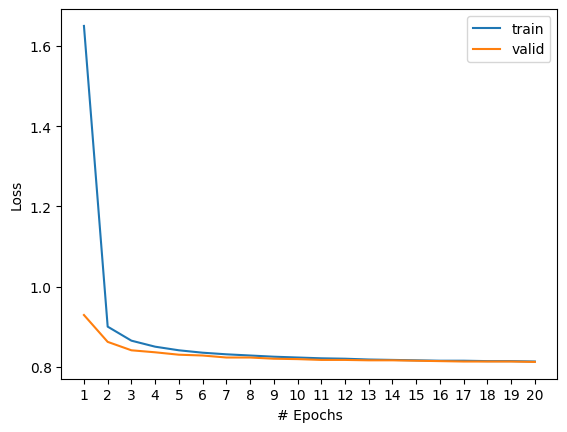

In [ ]:
import matplotlib.pyplot as plt

def get_losses(log_file):
  """This function takes in input a path of a log-file and outputs the train and
  valid losses in lists of float numbers"""

  x_epochs_list =[]
  train_loss_list = []
  valid_loss_list = []
  wer_list=[]
  with open(log_file) as f:
    lines=f.readlines()
    result=[]
    for x in lines:
        if x.split(' ')[0] != 'Epoch':
          x_epochs_list.append(int(x.split(' ')[1].split(',')[0]))
          train_loss_list.append(float((x.split(' ')[7])))
          valid_loss_list.append(float(x.split(' ')[11].split(',')[0]))
          wer_list.append(float(x.split(' ')[17].split(',')[0]))

  return x_epochs_list, train_loss_list, valid_loss_list, wer_list

log_file = 'results/baseline_unigrams/1986/train_log.txt'
x_epochs, train_losses, valid_losses, wer = get_losses(log_file)

default_x_ticks = range(len(x_epochs))
plt.plot(default_x_ticks, train_losses, label='train')
plt.plot(default_x_ticks, valid_losses, label='valid')
plt.xticks(default_x_ticks, x_epochs)
plt.ylabel('Loss')
plt.xlabel('# Epochs')
plt.legend()
plt.show()

#### Conclusion
The model benefits from the bi-directionality of the encoder. It generates replies of better quality compared to the previous model, but the training is much slower and requires more resources.

We increased the capacity of the baseline model. We employ 128-dimensional embeddings and we increased the hidden size of the encoder and the decoder. Now we have to train much more parameters. By comparing the WER graphs (Figure 3.), the increased capacity leads to better WER.
For the decoding process, we use beam search with a beam size of 3.  The selected combinations of batch size and learning rate yield a good convergence rate. We employ the Adam optimizer to update the model's parameters. This model requires much more computational ressources and takes much more time to train.

This model, as the previous one, uses cross attention mechanism between the encoder and the decoder to help the decoder attend to relevant parts of the dialogue history when genaerating the reply.


Figure 3. WER graphs

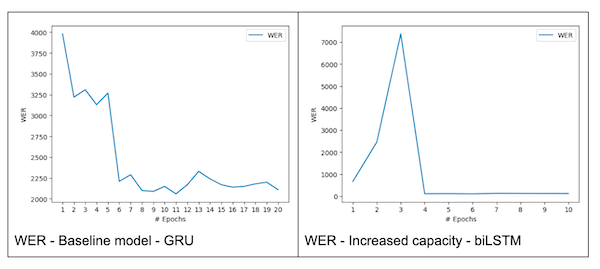

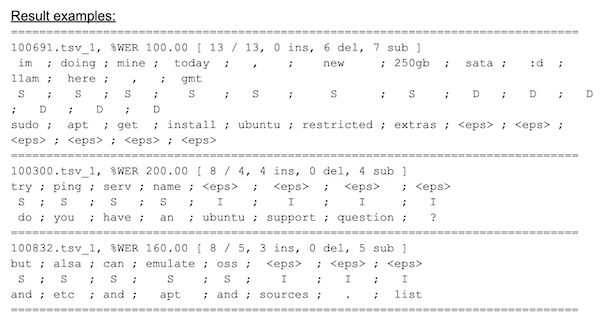

# 6.Transformers-based model
_Task3. Enhance the previous architecture to incorporate the dialogue history, using a self-attention mechanism to summarize previous inputs, or alternative attention methods that have access to the whole history._
_Task4. Compare the performance of a transformer-based model to that of the LSTM-based model._

Model: E2E Dialogue model - Transformer-based  
Encoder: Transformer  
Decoder: Transformer + greedy search  
Tokens: Characters + CTCTextEncoder  
loss: NLL  



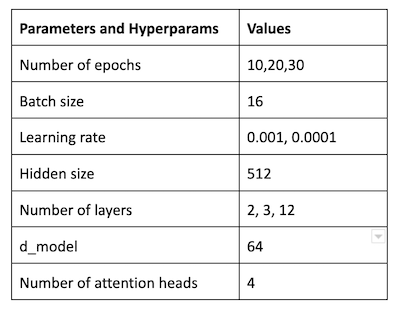

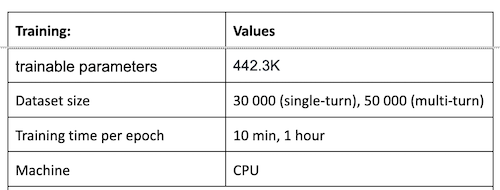

## 6.1 Self Attention

Self-attention mechanism contributes to the efficiency of the Transformer architecture for the dialogue task, because the model needs to understand well the context in order to generate relevant reply.
 
We model the dialogue history by concatenating all the previous turns, hence the input sequence could be quite long. We can observe that the Transformer model has more difficulties with the longer sequences than with the shorter ones. 

Further improvements could be achieved by increasing the number of attention heads in order to learn different features and better representation.


In [18]:
%%file hparams_dialogue_transformer.yaml
# ############################################################################
# Model: E2E Dialogue model - Transformer-based
# Encoder: Transformer
# Decoder: Transformer + greedy search
# Tokens: Characters + CTCTextEncoder
# losses: NLL
##############################################################################

# Seed needs to be set at top of yaml, before objects with parameters are instantiated
seed: 1986
__set_seed: !apply:torch.manual_seed [!ref <seed>]

# folder set up
data_folder: !ref ./
output_folder: !ref ./results/DialogueTransformer/<seed>
wer_file: !ref <output_folder>/wer.txt
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt
bleu_file: !ref <output_folder>/bleu.txt

# data files
train_annotation: !ref train.json
valid_annotation: !ref valid.json
test_annotation: !ref test.json

# the train logger writes training statistics to a file, as well as stdout.
train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

# training parameters
number_of_epochs: 10
batch_size: 16
lr: 0.001
lr_final: 0.0001
test_batch_size: 4
sorting: ascending
# We remove utterance slonger than 1000 characters for single-turn dataset
avoid_if_longer_than: 5000


# dataloader options
train_dataloader_opts:
    batch_size: !ref <batch_size>
    num_workers: 6

valid_dataloader_opts:
    batch_size: !ref <batch_size>
    num_workers: 6

test_dataloader_opts:
    batch_size: !ref <test_batch_size>
    num_workers: 6

# vocabulary size
voc_size_context: 70  #input = history
voc_size_reply: 70    #labels = reply

# indexes for begin-of-sentence (bos) 
# and end-of-sentence (eos)
blank_index: 0 # special token is for padding
bos_index: 1
eos_index: 2
unk_index: 0

# Transformer paarameters
d_model: 64
nhead: 4
num_encoder_layers: 12
dim_feedforward: 64
dropout: 0.1
num_decoder_layers: 3
min_decode_ratio: 0.0
max_decode_ratio: 10.0
beam_size: 3
eos_threshold: 1.5
temperature: 1.25

# epoch counter 
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

# Transformer model 
Seq2SeqTransformer: !new:torch.nn.Transformer
    d_model: !ref <d_model>
    nhead: !ref <nhead>
    num_encoder_layers: !ref <num_encoder_layers>
    num_decoder_layers: !ref <num_decoder_layers>
    dim_feedforward: !ref <dim_feedforward>
    dropout: !ref <dropout>
    batch_first: True
    
# encoder embeddings
encoder_emb: !new:torch.nn.Embedding
    num_embeddings: !ref <voc_size_context>
    embedding_dim: !ref <d_model>
    padding_idx: !ref <blank_index>
    
# positional embeddings
pos_emb_enc: !new:speechbrain.lobes.models.transformer.Transformer.PositionalEncoding
    input_size: !ref <d_model>
    max_len: 5000

pos_emb_dec: !new:speechbrain.lobes.models.transformer.Transformer.PositionalEncoding
    input_size: !ref <d_model>
    max_len: 5000

# decoder embeddings           
decoder_emb: !new:torch.nn.Embedding
    num_embeddings: !ref <voc_size_reply>
    embedding_dim: !ref <d_model>
    padding_idx: !ref <blank_index>

# linear transformation on the top of the decoder.
seq_lin: !new:speechbrain.nnet.linear.Linear
    input_size: !ref <d_model>
    n_neurons: !ref <voc_size_reply>

# masks
lookahead_mask: !name:speechbrain.lobes.models.transformer.Transformer.get_lookahead_mask
padding_mask: !name:speechbrain.lobes.models.transformer.Transformer.get_key_padding_mask

# final softmax (for log posteriors computation).
log_softmax: !new:speechbrain.nnet.activations.Softmax
    apply_log: True

# nll loss
seq_cost: !name:speechbrain.nnet.losses.nll_loss
    label_smoothing: 0.1


# grouping objects in "modules" called in the Brain class
modules:
    Seq2SeqTransformer: !ref <Seq2SeqTransformer>
    encoder_emb: !ref <encoder_emb>
    pos_emb_enc: !ref <pos_emb_enc>
    decoder_emb: !ref <decoder_emb>
    pos_emb_dec: !ref <pos_emb_dec>
    seq_lin: !ref <seq_lin>


# gathering all the submodels in a single model object.
model: !new:torch.nn.ModuleList
    - - !ref <Seq2SeqTransformer>
      - !ref <encoder_emb>
      - !ref <seq_lin> 
      - !ref <decoder_emb>
     

# manage learning rate annealing over the epochs.
lr_annealing: !new:speechbrain.nnet.schedulers.LinearScheduler
    initial_value: !ref <lr>
    final_value: !ref <lr_final>
    epoch_count: !ref <number_of_epochs>

# optimizer - constructed by the Brain class 
opt_class: !name:torch.optim.Adam
    lr: !ref <lr>
   
# saving the state of training so that 
# it can be resumed if it gets interrupted
# the best checkpoint can be loaded for evaluation or inference.
checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        model: !ref <model>
        counter: !ref <epoch_counter>

# performance statistics
error_rate_computer: !name:speechbrain.utils.metric_stats.ErrorRateStats 

cer_computer: !name:speechbrain.utils.metric_stats.ErrorRateStats 
    split_tokens: True 

bleu_computer: !name:speechbrain.utils.bleu.BLEUStats
    merge_words: True

acc_computer: !name:speechbrain.utils.Accuracy.AccuracyStats


Writing hparams_dialogue_transformer.yaml


Now we prepare the training script train_dialogue_transformer.py

In [21]:
%%file train_dialogue_transformer.py
#!/usr/bin/env/python3
"""Recipe for training a sequence-to-sequence dialogue model.
The system employs a Transformer.

To run this recipe, do the following:
> python train.py hparams/Transformers.yaml

The neural network is trained with the negative-log likelihood objective and
characters are used as basic tokens for both context and reply.
"""

import os
import sys
import torch
import logging
import speechbrain as sb
from hyperpyyaml import load_hyperpyyaml
#import sacrebleu
import math

logger = logging.getLogger(__name__)


# Brain class for speech recognition training
class DialogueTransformer(sb.Brain):
    """Class that manages the training loop."""

    def compute_forward(self, batch, stage):
        """Computations from the input to the output representing 
        the generated dialogue reply conditioned on the input.

        Arguments
        ---------
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.

        Returns
        -------
        predictions, hyps : torch.tensor
            predictions: Log-probabilities predicted by the decoder.
            hyps: At validation/test time, it returns the predicted tokens as well.
        """
        # first move the batch to the appropriate device.
        batch = batch.to(self.device)
        
        # unpack input
        enc_history, inp_lens = batch.history_encoded_chars        
        enc_reply_bos,  out_lens = batch.reply_encoded_chars_bos  
        
        # input embeddings
        enc_emb = self.modules.encoder_emb(enc_history)            
        
        # positional embeddings
        pos_emb_enc = self.modules.pos_emb_enc(enc_emb)
        
        # sum up embeddings
        enc_emb = enc_emb + pos_emb_enc

        # decoding embeddings
        dec_emb = self.modules.decoder_emb(enc_reply_bos)
        pos_emb_dec = self.modules.pos_emb_dec(dec_emb)
        dec_emb = dec_emb + pos_emb_dec 
        
        # get target mask (to avoid looking ahead)
        tgt_mask = self.hparams.lookahead_mask(enc_reply_bos) 
        
        # get the source mask (all zeros is fine in this case to allow the
        # network to embed both past and future history)
        src_mask = torch.zeros(enc_history.shape[1], enc_history.shape[1])
        
        # padding masks for source and targets (use padding_mask)
        src_key_padding_mask = self.hparams.padding_mask(padded_input=enc_history, pad_idx=self.hparams.blank_index)  
        tgt_key_padding_mask = self.hparams.padding_mask(padded_input=enc_reply_bos, pad_idx=self.hparams.blank_index)  
        
        # run the Seq2Seq Transformer
        decoder_outputs = self.modules.Seq2SeqTransformer(
            src = enc_emb, 
            tgt = dec_emb, 
            src_mask = src_mask, 
            tgt_mask = tgt_mask, 
            src_key_padding_mask = src_key_padding_mask, 
            tgt_key_padding_mask = tgt_key_padding_mask
        ).to(self.device)
        
        # compute logits
        logits = self.modules.seq_lin(decoder_outputs)
        
        # apply log softmax
        predictions = self.hparams.log_softmax(logits)
           
        #  Generate Hypothesis for validation and test using greedy search
        if stage != sb.Stage.TRAIN:
            
            # Greedy Decoding
            hyps = predictions.argmax(-1)
            
            # getting the first index where the prediciton is eos_index
            stop_indexes = (hyps==self.hparams.eos_index).int()
            stop_indexes = stop_indexes.argmax(dim=1)
            
            # Converting hyps from indexes to chars
            hyp_lst = []
            for hyp, stop_ind in zip(hyps, stop_indexes):
                # in some cases the eos in not observed (e.g, for the last sentence
                # in the batch)
                if stop_ind == 0:
                    stop_ind = -1
                # Stopping when eos is observed
                hyp = hyp[0:stop_ind]
                # From index to character
                hyp_lst.append(self.label_encoder.decode_ndim(hyp))
            return predictions, hyp_lst
        
        return predictions, None

    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss given the predicted and targeted outputs.
        
        Arguments
        ---------
        predictions : torch.tTensor
            The output tensor from `compute_forward`.
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.

        Returns
        -------
        loss : torch.Tensor
            A one-element tensor used for backpropagating the gradient.
        """
        # unpack labels
        ids = batch.id
        enc_reply_eos, reply_lens = batch.reply_encoded_chars_eos

        # unpack predictions
        predictions, hyp_lst = predictions

        
        # compute loss
        loss = self.hparams.seq_cost(predictions, 
                                     enc_reply_eos, 
                                     length=reply_lens)

        if stage != sb.Stage.TRAIN:
          
          for id, label, hyp in zip(batch.id, batch.reply_chars, hyp_lst):
              # get the target and predicted words in the necessary format
              target_words = [''.join(label).split(' ')]
              predicted_words = [''.join(hyp).split(' ')]

              self.wer_metric.append(id, predicted_words, target_words)
              self.cer_metric.append(id, predicted_words, target_words)
              #self.bleu_metric.append(id, predicted_words, target_words)
              
        
        return loss

    def on_stage_start(self, stage, epoch): 
        """Gets called at the beginning of each epoch""" 
        
        if stage != sb.Stage.TRAIN: 
            self.cer_metric = self.hparams.cer_computer() 
            self.wer_metric = self.hparams.error_rate_computer() 
            self.bleu_metric = self.hparams.bleu_computer()
            self.acc_metric = self.hparams.acc_computer()

    def on_stage_end(self, stage, stage_loss, epoch):
        """Gets called at the end of an epoch.

        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, sb.Stage.TEST
        stage_loss : float
            The average loss for all of the data processed in this stage.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """

        # compute stats
        stage_stats = {"loss": stage_loss}
        if stage == sb.Stage.TRAIN:
            self.train_stats = stage_stats
        else:
            stage_stats["CER"] = self.cer_metric.summarize("error_rate")
            stage_stats["WER"] = self.wer_metric.summarize("error_rate")
            stage_stats["SER"] = self.wer_metric.summarize("SER")

            # TODO scarebleu not working in Gradient enviroment
            stage_stats["BLEU"] = self.bleu_metric.summarize("BLEU")
            perplexity = math.e**stage_loss
            stage_stats["perplexity"] = perplexity


        # perform end-of-iteration things, like annealing, logging, etc.
        # learning rate annealing and checkpoint
        if stage == sb.Stage.VALID:
                
            # update learning rate
            old_lr, new_lr = self.hparams.lr_annealing(epoch)
            sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)

            # write a summary to stdout and to the logfile.
            self.hparams.train_logger.log_stats(
                stats_meta={"epoch": epoch, "lr": old_lr},
                train_stats=self.train_stats,
                valid_stats=stage_stats,
            )

            # save the current checkpoint and delete previous checkpoints.
            self.checkpointer.save_and_keep_only(
                meta={"loss": stage_stats["loss"]}, min_keys=["loss"],
            )
        # write statistics about test data to stdout and to the logfile   
        elif stage == sb.Stage.TEST:
            self.hparams.train_logger.log_stats(
                stats_meta={"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stage_stats,
            )
            with open(self.hparams.wer_file, "w") as w:
                self.wer_metric.write_stats(w)

            # TODO - why BLEU gives an error: sacrebleu - IndexError: list index out of range
            with open(self.hparams.bleu_file, "w", encoding="utf-8") as w:
                self.bleu_metric.write_stats(w)
            
        
def dataio_prepare(hparams):
    # Define text processing pipeline. We start from the raw text and then
    # split it into characters. The tokens with BOS are used for feeding
    # the decoder during training (right shifr), the tokens with EOS 
    # are used for computing the cost function.
    @sb.utils.data_pipeline.takes("reply")
    @sb.utils.data_pipeline.provides(
        "reply",
        "reply_chars",
        "reply_encoded_chars_lst",
        "reply_encoded_chars",
        "reply_encoded_chars_eos",
        "reply_encoded_chars_bos",
        )
    def reply_text_pipeline(reply):
        yield reply
        reply_chars = list(reply)
        yield reply_chars
        reply_encoded_chars_lst = label_encoder.encode_sequence(reply_chars)
        yield reply_encoded_chars_lst 
        reply_encoded_chars = torch.LongTensor(reply_encoded_chars_lst)
        yield reply_encoded_chars
        reply_encoded_chars_eos = torch.LongTensor(label_encoder.append_eos_index(reply_encoded_chars_lst))
        yield reply_encoded_chars_eos                                              
        reply_encoded_chars_bos = torch.LongTensor(label_encoder.prepend_bos_index(reply_encoded_chars_lst))
        yield reply_encoded_chars_bos  

    @sb.utils.data_pipeline.takes("history")
    @sb.utils.data_pipeline.provides("history", "history_chars", "history_encoded_chars")
    def history_text_pipeline(history):
        yield history
        history_chars = list(history)
        yield history_chars
        history_encoded_chars = torch.LongTensor(input_encoder.encode_sequence(history_chars))
        yield history_encoded_chars

    # Define datasets from json data manifest file
    # Define datasets sorted by ascending lengths for efficiency
    datasets = {}
    data_info = {
        "train": hparams["train_annotation"],
        "valid": hparams["valid_annotation"],
        "test": hparams["test_annotation"],
    }
    
    # The label encoder will assign a different integer to each element
    # in the output vocabulary
    input_encoder = sb.dataio.encoder.CTCTextEncoder()
    label_encoder = sb.dataio.encoder.CTCTextEncoder()


    for dataset in data_info:
        datasets[dataset] = sb.dataio.dataset.DynamicItemDataset.from_json(
            json_path=data_info[dataset],
            dynamic_items=[reply_text_pipeline, history_text_pipeline],
            output_keys=[
                "id",
                "reply",
                "reply_chars",
                "reply_encoded_chars",
                "reply_encoded_chars_eos",
                "reply_encoded_chars_bos",
                "history",
                "history_chars",
                "history_encoded_chars",
            ],
        )
        
        # sort by length
        if hparams["sorting"] == "ascending":
            # we sort training data to speed up training and get better results.
            datasets[dataset] = datasets[dataset].filtered_sorted(
                sort_key="length",
                key_max_value={"length": hparams["avoid_if_longer_than"]},
            )
            # when sorting do not shuffle in dataloader ! otherwise is pointless
            hparams[f"{dataset}_dataloader_opts"]["shuffle"] = False

        elif hparams["sorting"] == "descending":
            datasets[dataset] = datasets[dataset].filtered_sorted(
                sort_key="length",
                reverse=True,
                key_max_value={"length": hparams["avoid_if_longer_than"]},
            )
            # when sorting do not shuffle in dataloader ! otherwise is pointless
            hparams[f"{dataset}_dataloader_opts"]["shuffle"] = False

        elif hparams["sorting"] == "random":
              hparams[f"{dataset}_dataloader_opts"]["shuffle"] = True

        else:
            raise NotImplementedError(
                "sorting must be random, ascending or descending"
            )


    # Load or compute the label encoder
    inp_enc_file = os.path.join(hparams["save_folder"], "input_encoder.txt")
    
    # The blank symbol is used to indicate padding
    special_labels = {"blank_label": hparams["blank_index"]}
    input_encoder.add_unk()
    input_encoder.load_or_create(
        path=inp_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="history_chars",
        special_labels=special_labels,
        sequence_input=True,
    )
        
    # Load or compute the label encoder
    lab_enc_file = os.path.join(hparams["save_folder"], "label_encoder.txt")
    special_labels = {
        "blank_label": hparams["blank_index"],
        "bos_label": hparams["bos_index"],
        "eos_label": hparams["eos_index"],
    }
    label_encoder.add_unk()
    label_encoder.load_or_create(
        path=lab_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="reply_chars",
        special_labels=special_labels,
        sequence_input=True,
    )
    
    return datasets, label_encoder


if __name__ == "__main__":

    # read command line arguments
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])

    # load hyperparameters file with command-line overrides
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin, overrides)

    # create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )


    # create the datasets for training, valid, and test
    datasets, label_encoder = dataio_prepare(hparams)

    # trainer initialization
    dialogue_brain = DialogueTransformer(
        modules=hparams["modules"],
        opt_class=hparams["opt_class"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )
    
    # make label encoder accessible (needed for computer the character error rate)
    dialogue_brain.label_encoder = label_encoder


    # The `fit()` method iterates the training loop, calling the methods
    # necessary to update the parameters of the model. Since all objects
    # with changing state are managed by the Checkpointer, training can be
    # stopped at any point, and will be resumed on next call.
    dialogue_brain.fit(
        dialogue_brain.hparams.epoch_counter,
        datasets["train"],
        datasets["valid"],
        train_loader_kwargs=hparams["train_dataloader_opts"],
        valid_loader_kwargs=hparams["valid_dataloader_opts"],
    )

    # Load best checkpoint for evaluation
    test_stats = dialogue_brain.evaluate(
        test_set=datasets["test"],
        min_key="WER",
        test_loader_kwargs=hparams["test_dataloader_opts"],
    )
    

Overwriting train_dialogue_transformer.py


### run train_dialogue_transformer.py

In [ ]:
#!rm -rf ./results/DialogueTransformer/1986

In [ ]:
!python train_dialogue_transformer.py hparams_dialogue_transformer.yaml --device='cpu' --number_of_epochs=1

speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: ./results/DialogueTransformer/1986
speechbrain.dataio.encoder - Load called, but CTCTextEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.dataio.encoder - Load called, but CTCTextEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.dataio.encoder - Load called, but CTCTextEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.dataio.encoder - Load called, but CTCTextEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - 442.3k trainable parameters in DialogueTransformer
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will cre

### Visualization

In [22]:
%%file visualize.py

import matplotlib.pyplot as plt

def visualize_logs(log_file, model=""):

    def get_losses(log_file):
      """This function takes in input a path of a log-file and outputs 
      the log information as lists of float numbers"""

      x_epochs_list =[]
      train_loss_list = []
      valid_loss_list = []
      wer_list=[]
      bleu_list=[]
      perplexity_list = []
      with open(log_file) as f:
        lines=f.readlines()
        result=[]
        for x in lines:
            if x.split(' ')[0] != 'Epoch':
              x_epochs_list.append(int(x.split(' ')[1].split(',')[0]))
              train_loss_list.append(float((x.split(' ')[7])))
              valid_loss_list.append(float(x.split(' ')[11].split(',')[0]))
              wer_list.append(float(x.split(' ')[17].split(',')[0]))
              if len(x.split(' ')) > 20 :
                  bleu_list.append(float(x.split(' ')[20].split(',')[0]))
                  perplexity_list.append(float(x.split(' ')[23]))

      return x_epochs_list, train_loss_list, valid_loss_list, wer_list, bleu_list, perplexity_list


    x_epochs, train_losses, valid_losses, wer, bleu, perplexity = get_losses(log_file)

    fig, axs = plt.subplots(2,2)
    fig.suptitle(model)
    fig.tight_layout(pad=3)
    default_x_ticks = range(1, len(x_epochs)+1)
    axs[0,0].plot(default_x_ticks, train_losses, label='train')
    axs[0,0].plot(default_x_ticks, valid_losses, label='valid')
    axs[0,0].set_xticks(default_x_ticks, minor=False)
    axs[0,0].set_ylabel('Loss')
    axs[0,0].set_xlabel('# Epochs')
    axs[0,0].legend()

    axs[0,1].plot(default_x_ticks, perplexity, label='perplexity')
    axs[0,1].set_xticks(default_x_ticks, minor=False)
    axs[0,1].set_ylabel('perplexity')
    axs[0,1].set_xlabel('# Epochs')
    axs[0,1].legend()

    axs[1,0].plot(default_x_ticks, wer, label='WER')
    axs[1,0].set_xticks(default_x_ticks, minor=False)
    axs[1,0].set_ylabel('WER')
    axs[1,0].set_xlabel('# Epochs')
    axs[1,0].legend()

    axs[1,1].plot(default_x_ticks, bleu, label='BLEU')
    axs[1,1].set_xticks(default_x_ticks, minor=False)
    axs[1,1].set_ylabel('BLEU')
    axs[1,1].set_xlabel('# Epochs')
    axs[1,1].legend()
    plt.show()

Writing visualize.py


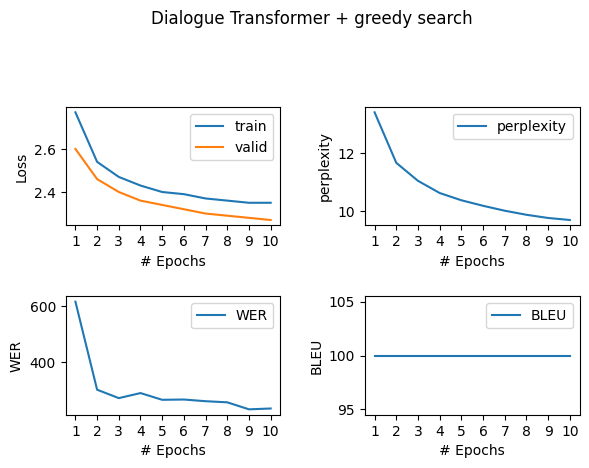

In [ ]:
log_file = 'results/DialogueTransformer/1986/train_log.txt'
model = 'Dialogue Transformer + greedy search'
visualize_logs(log_file, model) 

### Conclusion
Compared to Recurrent Neural Networks (RNNs), the Transformer-based model generates better-quality responses. We dont see repetitions as in the previous models. The generated responses are closer to the target. It seems this model learns better from the context. The self-attention mechanism certainly helps to draw dependencies within the dialogue history. In addition this model is parallelizable.


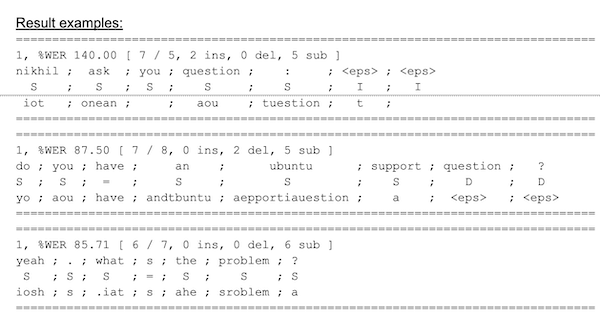

## 6.2 Hierarchical Self Attention

A dialog has a hierarchical structure. It is not simply a sequence of words. It is a sequence of sequences of words, i.e. it consist of sequence of turns and each turn is a sequence of words/ tokens. We have to consider this hierarchy in data and look for better representation of the dialogue.

Previously, hierarchical encoder architectures have been applied for the dialogue generation task [4, 5]. In this project we propose hierarchical self-attention mechanism, because it will enable the model to attend to different levels within the input structure. It will capture first which dialogue utterance is important, and then, which word within each utterance should be attended.


NOTE: More work is required to parallelize this computation. The attention weights are also computed in parallel for all the input tokens.
This is just an idea for eventual hierarchical attention mechanism

In [ ]:
import torch 
import torch.nn as nn 

class HierarchicalSelfAttention(nn.Module): 
    def __init__(self, layer1_size, layer2_size, d_model, nhead): 

        super(HierarchicalSelfAttention, self).__init__() 

        self.num_turns = layer1_size
        self.turn_size = layer2_size

        # self-attention per turn 
        self.self_attentions = nn.ModuleList([ 
            nn.MultiheadAttention(d_model, num_heads=8) for _ in range(layer2_size) 
        ]) 
  
        # self-attention across all turns
        self.self_attention = nn.MultiheadAttention(d_model, num_heads=8) 

        
    def forward(self, x): 

        # apply self-attention within each turn 
        turn_representations = [] 
        attn_weights_per_turn = []

        for i in range(self.num_turns): 
            x = x[:, i, :, :]
            turn_rep, attn_weights = self.self_attentions[i](x,x,x, need_weights=True) 
            turn_representations.append(turn_rep) 
            attn_weights_per_turn.append(attn_weights)
      
        # aggregate all turn representations 
        # max, sum or concatenation ????
        x = torch.cat(turn_representations, dim=1) 
        x, _ = torch.max(x, dim=1)       

        # apply last self-attention across turns 
        output, last_attention_weights = self.self_attention(x, x, x, need_weights=True) 
    
        return output, last_attention_weights, attn_weights_per_turn
           

# 7.GPT2 Language Model fine-tuned

It is interesting to see if we can obtain better performance if we fine-tune the GPT2 model using the Ubuntu corpus. GPT2 is a very large language model pre-trained on massive amounts of data. It is suitable for generating text because it is autorgressive, it is designed to generate text in sequential manner by predicting the next token in a sequence based on the preceding tokens.

In [25]:
%%file huggingface_GPT.py

import logging

from torch import Tensor
import torch
import torch.nn as nn
from transformers import GPT2LMHeadModel

logger = logging.getLogger(__name__)


class HuggingFaceGPT(nn.Module):
    """This lobe enables the integration of HuggingFace pretrained GPT model.
      Arguments
    ---------
    source : str
        HuggingFace hub name: e.g "gpt2"
    save_path : str
        Path (dir) of the downloaded model.
    freeze : bool (default: False)
        If True, the model is frozen. If False, the model will be trained
        alongside with the rest of the pipeline.
    """

    def __init__(self, source: str, save_path: str, freeze: bool = False) -> None:
        super().__init__()
        self.freeze = freeze
        self.model = GPT2LMHeadModel.from_pretrained(source, cache_dir=save_path)
        if self.freeze:
            logger.warning(
                "huggingface_GPT - GPT  is frozen."
            )
            self.model.train()  # we keep it to train to have dropout and LN computed adequaly
            for param in self.model.parameters():
                param.requires_grad = False
        else:
            self.model.train()
            for param in self.model.parameters():
                param.requires_grad = False

    def forward(self, input_ids: Tensor, token_type_ids: Tensor):
        with torch.set_grad_enabled(not self.freeze):
          
            output = self.model.forward(input_ids, token_type_ids=token_type_ids)
        return output

Overwriting huggingface_GPT.py


In [27]:
%%file hparams_gpt2.yaml

# Seed needs to be set at top of yaml, before objects with parameters are made
seed: 1993
__set_seed: !apply:torch.manual_seed [!ref <seed>]

# Dataset will be downloaded to the `data_original`
data_folder: ./data
output_folder: !ref ./results/DialogueGPT2/<seed>
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt
wer_file: !ref <output_folder>/wer.txt


# URL for the wav2vec2 model, you can change to benchmark diffrenet models
# Important: we use wav2vec2 base and not the fine-tuned one with ASR task
# This allow you to have ~4% improvment
gpt_hub: gpt2
gpt_folder: !ref <save_folder>/gpt_checkpoint

# Path where data manifest files will be stored
train_annotation: !ref <data_folder>/train.json
valid_annotation: !ref <data_folder>/valid.json
test_annotation: !ref <data_folder>/test.json

# The train logger writes training statistics to a file, as well as stdout.
train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

# Special tokens
bos_token: "BOS"
eos_token: "EOS"

system_token: "SPK_1"
user_token: "SPK_2"

additional_special_tokens : [
    !ref <system_token>,
    !ref <user_token>
]

special_tokens: [
    !ref <bos_token>,
    !ref <eos_token>,
    !ref <system_token>,
    !ref <user_token>
]

attr_to_special_tokens:
    "bos_token": !ref <bos_token>
    "eos_token": !ref <eos_token>
    "additional_special_tokens": !ref <additional_special_tokens>

# training parameters
number_of_epochs: 10
batch_size: 8
lr: 1.97125e-4
max_history: 2
with_eos: True

# freeze GPT model 
freeze_gptmodel: False


dataloader_options:
    batch_size: !ref <batch_size>
    shuffle: True
    num_workers: 2  # 2 on linux but 0 works on windows
    drop_last: False

# gpt model
gpt_model: !new:huggingface_GPT.HuggingFaceGPT
    source: !ref <gpt_hub>
    freeze: !ref <freeze_gptmodel>
    save_path: !ref <gpt_folder>


epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

modules:
    gpt_model: !ref <gpt_model>

model: !new:torch.nn.ModuleList
    - [!ref <gpt_model>]

log_softmax: !new:speechbrain.nnet.activations.Softmax
    apply_log: True

compute_cost: !name:speechbrain.nnet.losses.nll_loss


opt_class: !name:torch.optim.AdamW
    lr: !ref <lr>


lr_annealing: !new:speechbrain.nnet.schedulers.NewBobScheduler
    initial_value: !ref <lr>
    improvement_threshold: 0.0025
    annealing_factor: 0.9
    patient: 0

checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        gpt_model: !ref <gpt_model>
        lr_annealing_output: !ref <lr_annealing>
        counter: !ref <epoch_counter>

# performance statistics
error_rate_computer: !name:speechbrain.utils.metric_stats.ErrorRateStats 

cer_computer: !name:speechbrain.utils.metric_stats.ErrorRateStats 
    split_tokens: True 

Overwriting hparams_gpt2.yaml


In [28]:
%%file train_dialogue_gpt2.py

import os
import sys
import speechbrain as sb
import torch
from itertools import chain
from hyperpyyaml import load_hyperpyyaml

from transformers import GPT2Tokenizer


class ResGenBrain(sb.Brain):
    def compute_forward(self, batch, stage):
        """Computation pipeline based on a encoder + emotion classifier.
        """
        # Get required data from batch
        batch = batch.to(self.device)
        input_ids, _ = batch.input_ids
        token_type_ids, _ = batch.token_type_ids

        # Forward Pass
        outputs = self.modules.gpt_model(
            input_ids,
            token_type_ids,
        ).logits   
        #[8, 145, 50261]


        #  apply softmax if necessary
        predictions = self.hparams.log_softmax(outputs)
         #[8, 145, 50261]

        if stage != sb.Stage.TRAIN:
            
            # Greedy Decoding
            hyps = predictions.argmax(dim=-1) # (8,145)
            #print("hyps--------------")
            #print(hyps[0,:])

            # getting the first index where the prediciton is eos_index
            #print(self.hparams.eos_token)

            # what is the index of the EOS token
            eos_index = self.tokenizer.convert_tokens_to_ids(self.hparams.eos_token) #50258
            stop_indexes = (hyps==eos_index).int()
            stop_indexes = stop_indexes.argmax(dim=1)

            #stop_indexes = stop_indexes.flatten().tolist()
            #print("stop_indexes----", stop_indexes)
            
            # Converting hyps from indexes to chars
            hyp_lst = []
            count=0
            for hyp, stop_ind in zip(hyps, stop_indexes):
                count+=1

                # Stopping when eos is observed
                hyp = hyp[0:stop_ind]
                # From index to character

                hyp_lst.append(self.tokenizer.convert_ids_to_tokens(hyp))

            return predictions, hyp_lst
        
        return predictions, None


    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss using speaker-id as label.
        """
        # Get required data from batch
        lm_labels, labels_lens = batch.lm_labels

        predictions, hyp_lst = predictions

        # Calculate Loss function
        predictions_flatten = predictions.contiguous().view(-1, predictions.size(-1))
        lm_labels_flatten = lm_labels.contiguous().view(-1)

        loss = self.hparams.compute_cost(predictions, lm_labels, labels_lens)

        '''
        if stage != sb.Stage.TRAIN:
          
          for id, label, hyp in zip(batch.id, batch.lm_labels, hyp_lst):
              # get the target and predicted words in the necessary format
              target_words = [''.join(label).split(' ')]
              predicted_words = [''.join(hyp).split(' ')]
              print("---------predicted_words=", predicted_words)
              print("---------target_words=", target_words)

              self.wer_metric.append(id, predicted_words, target_words)
              self.cer_metric.append(id, predicted_words, target_words)
        '''

        return loss

    def fit_batch(self, batch):
        """Trains the parameters given a single batch in input"""

        predictions = self.compute_forward(batch, sb.Stage.TRAIN)
        loss = self.compute_objectives(predictions, batch, sb.Stage.TRAIN)
        loss.backward()
        if self.check_gradients(loss):
            self.optimizer.step()
        self.optimizer.zero_grad()

        return loss.detach()

    def on_stage_start(self, stage, epoch): 
        """Gets called at the beginning of each epoch""" 
        
        if stage != sb.Stage.TRAIN: 
            self.cer_metric = self.hparams.cer_computer() 
            self.wer_metric = self.hparams.error_rate_computer() 
           

    def on_stage_end(self, stage, stage_loss, epoch):
        """Gets called at the end of an epoch.

        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, sb.Stage.TEST
        stage_loss : float
            The average loss for all of the data processed in this stage.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """

        # Store the train loss until the validation stage.
        stage_stats = {"loss": stage_loss}
        if stage == sb.Stage.TRAIN:
            self.train_stats = stage_stats
        #else: TODO
            #stage_stats["CER"] = self.cer_metric.summarize("error_rate")
            #stage_stats["WER"] = self.wer_metric.summarize("error_rate")
            #stage_stats["SER"] = self.wer_metric.summarize("SER")


        # Perform end-of-iteration things, like annealing, logging, etc.
        if stage == sb.Stage.VALID:
            

            # Update learning rate
            old_lr, new_lr = self.hparams.lr_annealing(epoch)
            sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)

            # The train_logger writes a summary to stdout and to the logfile.
            self.hparams.train_logger.log_stats(
                stats_meta={"epoch": epoch, "lr": old_lr},
                train_stats=self.train_stats,
                valid_stats={
                    "loss": stage_loss,
                },
            )
            # Save the current checkpoint and delete previous checkpoints.
            self.checkpointer.save_and_keep_only(
                meta={"loss": stage_stats["loss"]}, min_keys=["loss"],
            )

        # We also write statistics about test data to stdout and to the logfile.
        elif stage == sb.Stage.TEST:
            
            self.hparams.train_logger.log_stats(
                stats_meta={"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats={
                    "loss": stage_loss,
                },
            )

            #TODO
            #with open(self.hparams.wer_file, "w") as w:
            #    self.wer_metric.write_stats(w)


    def init_optimizers(self):
        "Initializes the model optimizer"
        self.optimizer = self.hparams.opt_class(self.hparams.model.parameters())

        if self.checkpointer is not None:
            self.checkpointer.add_recoverable("optimizer", self.optimizer)

    def zero_grad(self, set_to_none=False):
        self.optimizer.zero_grad(set_to_none)


def add_special_tokens_(
    model,
    tokenizer,
    attr_to_special_token,
) -> None:
    orig_num_tokens = len(tokenizer.encoder)
    num_added_tokens = tokenizer.add_special_tokens(
        attr_to_special_token  # type: ignore
    )  # doesn't add if they are already there
    if num_added_tokens > 0:
        model.resize_token_embeddings(new_num_tokens=orig_num_tokens + num_added_tokens)


def dataio_prep(hparams, tokenizer):
    """This function prepares the datasets to be used in the brain class.
    It also defines the data processing pipeline through user-defined
    functions. We expect `prepare_mini_librispeech` to have been called before
    this, so that the `train.json`, `valid.json`,  and `valid.json` manifest
    files are available.
    Arguments
    ---------
    hparams : dict
        This dictionary is loaded from the `train.yaml` file, and it includes
        all the hyperparameters needed for dataset construction and loading.
    Returns
    -------
    datasets : dict
        Contains two keys, "train" and "valid" that correspond
        to the appropriate DynamicItemDataset object.
    """

    # convert special tokens to their ids
    bos, eos, system, user =  tokenizer.convert_tokens_to_ids(hparams["special_tokens"])
    # history_window, i.e. how many user-system exchanges consider as context (+1 to consider at least the last user turn)
    history_window = 2*hparams["max_history"]+1

    #  Define histoy pipeline:
    @sb.utils.data_pipeline.takes("history")
    @sb.utils.data_pipeline.provides(
        "history", "history_tokens_lists", "history_input_lists", "history_token_type_lists"
    )
    def history_pipeline(history):
        yield history

        # encode each turn of the history
        history_tokens_lists = [tokenizer.encode(turn) for turn in history]
        yield history_tokens_lists

        # add speaker tokens to the history turns (user is even, system is odd)
        # BEFORE:  [Hi how are you?], [I'm fine, thanks]
        # AFTER:   [SPK_1 Hi how are you?], [SPK_2 I'm fine, thanks]
        history_input_lists = [[user if i%2==0 else system] + encoded_turn for i, encoded_turn in enumerate(history_tokens_lists)]
        yield history_input_lists

        # create a mapping that associates each token in the input to a speaker
        # INPUT: [SPK_1 Hi    how   are   you? ], [SPK_2 I'm   fine, thanks]
        # TYPE:  [SPK_1 SPK_1 SPK_1 SPK_1 SPK_1], [SPK_2 SPK_2 SPK_2 SPK_2 ]
        history_token_type_lists = [[user if i%2==0 else system]*len(encoded_turn) for i, encoded_turn in enumerate(history_input_lists)]
        yield history_token_type_lists
        
      
    #  Define reply pipeline:
    @sb.utils.data_pipeline.takes("reply")
    @sb.utils.data_pipeline.provides(
        "reply", "reply_tokens_list", "reply_input_list", "reply_token_type_list"
    )
    def reply_pipeline(reply):
        yield reply

        # same as history
        reply_tokens_list = tokenizer.encode(reply)
        yield reply_tokens_list

        # specify that the system will say the reply
        reply_input_list = [system] + reply_tokens_list
        yield reply_input_list

        # specify the speaker for each token in the reply
        reply_token_type_list = [system]*len(reply_input_list)
        yield reply_token_type_list


    # Define input_and_token_type_pipeline
    @sb.utils.data_pipeline.takes(
        "history_input_lists", "history_token_type_lists", "reply_input_list", "reply_token_type_list"
    )
    @sb.utils.data_pipeline.provides("input_ids", "token_type_ids", "lm_labels")
    def input_and_token_type_pipeline(history_input_lists, history_token_type_lists, reply_input_list, reply_token_type_list):
        # optionally add eos to reply
        reply_input_list = reply_input_list + [eos] if hparams["with_eos"] else []

        # add bos and to the history
        history_input_lists = [[bos]] + history_input_lists[-history_window:]

        # put history and reply together
        input_sequence = history_input_lists + [reply_input_list]

        # concatenate every token into a single list
        # list(chain(*[[1, 2], [3, 4], [5]]))
        # >>> [1, 2, 3, 4, 5] 
        input_ids = list(chain(*input_sequence))
        input_ids = torch.LongTensor(input_ids)
        yield input_ids

        # do the same for the token_type
        reply_token_type_list = reply_token_type_list + [system] if hparams["with_eos"] else []

        # bos token belongs to the system
        history_token_type_lists = [[system]] + history_token_type_lists[-history_window:]

        token_type_ids = history_token_type_lists + [reply_token_type_list]

        token_type_ids = list(chain(*token_type_ids))
        token_type_ids = torch.LongTensor(token_type_ids)
        yield token_type_ids

        # create the language model label (ground truth) for the current input 
        # -100 is a special tokens that is ignored during the loss computation
        # the idea is to mask everything except the reply (withouth the speaker token)
        lm_labels = ([-100] * sum(len(s) for s in input_sequence[:-1])) + [-100] + input_sequence[-1][1:]
        lm_labels = torch.LongTensor(lm_labels)
        yield lm_labels


    # Define datasets. We also connect the dataset with the data processing
    # functions defined above.
    datasets = {}
    data_info = {
        "train": hparams["train_annotation"],
        "valid": hparams["valid_annotation"],
        "test": hparams["test_annotation"],
    }
    for dataset in data_info:
        datasets[dataset] = sb.dataio.dataset.DynamicItemDataset.from_json(
            json_path=data_info[dataset],
            replacements={"data_root": hparams["data_folder"]},
            dynamic_items=[reply_pipeline, history_pipeline, input_and_token_type_pipeline],
            output_keys=["id", "input_ids", "token_type_ids", "lm_labels"],
        )

    return datasets


# RECIPE BEGINS!
if __name__ == "__main__":

    # Reading command line arguments.
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])

    # Initialize ddp (useful only for multi-GPU DDP training).
    sb.utils.distributed.ddp_init_group(run_opts)

    # Load hyperparameters file with command-line overrides.
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin, overrides)

    # Create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )


    # Load tokenizer and add special tokens
    tokenizer = GPT2Tokenizer.from_pretrained(hparams['gpt_hub'])

    #  Load pretrained GPT
    hparams["gpt_model"] = hparams["gpt_model"].to(device=run_opts["device"])

    # Add special tokens to the tokenizer and resize model embedding
    add_special_tokens_(hparams["gpt_model"].model, tokenizer, hparams["attr_to_special_tokens"])

    # Create dataset objects "train", "valid", and "test".
    datasets = dataio_prep(hparams, tokenizer)

    # Initialize the Brain object to prepare for mask training.
    res_gen_brain = ResGenBrain(
        modules=hparams["modules"],
        opt_class=hparams["opt_class"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )

    # making tokenizer accessible (needed for computing the character/word error rate)
    res_gen_brain.tokenizer = tokenizer

    # The `fit()` method iterates the training loop, calling the methods
    # necessary to update the parameters of the model. Since all objects
    # with changing state are managed by the Checkpointer, training can be
    # stopped at any point, and will be resumed on next call.
    res_gen_brain.fit(
        epoch_counter=res_gen_brain.hparams.epoch_counter,
        train_set=datasets["train"],
        valid_set=datasets["valid"],
        train_loader_kwargs=hparams["dataloader_options"],
        valid_loader_kwargs=hparams["dataloader_options"],
    )

    # Load the best checkpoint for evaluation
    test_stats = res_gen_brain.evaluate(
        test_set=datasets["test"],
        min_key="error_rate",
        test_loader_kwargs=hparams["dataloader_options"],
    )

Writing train_dialogue_gpt2.py


In [29]:
!python train_dialogue_gpt2.py hparams_gpt2.yaml --data_folder='./' --device='cuda:0' --number_of_epochs=1 --batch_size=8


speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: ./results/DialogueGPT2/1993
speechbrain.core - 38.6M trainable parameters in ResGenBrain
speechbrain.utils.checkpoints - Would load a checkpoint here, but none found yet.
speechbrain.utils.epoch_loop - Going into epoch 1
  0% 9/3750 [03:12<22:11:32, 21.36s/it, train_loss=55.8]
speechbrain.core - Exception:
Traceback (most recent call last):
  File "/content/train_dialogue_gpt2.py", line 381, in <module>
    res_gen_brain.fit(
  File "/usr/local/lib/python3.9/dist-packages/speechbrain/core.py", line 1225, in fit
    self._fit_train(train_set=train_set, epoch=epoch, enable=enable)
  File "/usr/local/lib/python3.9/dist-packages/speechbrain/core.py", line 1078, in _fit_train
    loss = self.fit_batch(batch)
  File "/content/train_dialogue_gpt2.py", line 103, in fit_batch
    loss.backward()
  File "/usr/local/lib/python3.9/dist-packages/torch/_tensor.py", line 487, in backward
    torch.autograd.backward(
  File

More work is required. We have obtained the following loss for the single-turn and mutli-turn datasets:
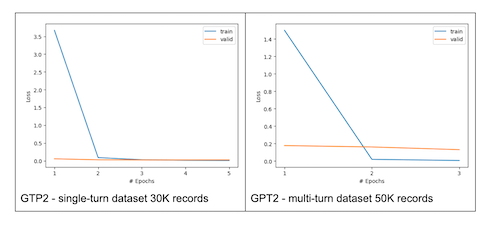

# 8.Evaluation of Dialogue Model

We are looking for an automatic way to measure the quality of the generated responses and we wish these metrics were close to human judgement. Often, the measures applied for the machine translation task (like WER, BLEU, ROUGE) are adopted for the dialogue response generation task. However, in the article “How NOT To Evaluate Your Dialogue System” [9] the authors explain that these metrics correlate weakly with human judgements in particular in the technical domain like the Ubuntu operating system. They recommend better automatic evaluation metrics that are more suitable for evaluating dialogue systems.


The metrics they propose are based on cosine distance between word embeddings because words that are close semantically will be close in the embedding vector space as well.
 
We report the following metrics:
- perplexity
- loss
- WER, CER, SER
- BLUE

and we propose the DialogueEvaluator class to calculate the embedding metrics:
- extrema embedding score
- greedy embedding score
- average embedding score


For the extrema embedding score:  
We need to compute the extrema vector by selecting the maximum value for each embedding vector. We then compute the cosine similarity between these extrema vectors. We also need to apply padding because both vectors should have the same dimension.

For the greedy embedding score:  
For each token in the generated text, we compute the cosine similarity between its embedding and the embeddings of all the tokens in the reference text,  i.e. each word of the reference  sentence is matched against all words of the target sentence to find the maximum cosine similarity
Then we select the reference token with the highest cosine similarity for each generated token,
and sum the cosine similarity scores for all the pairs of matched tokens.
And finally we take the average by deleting to the number of predicted tokens.

For the average embedding score:  
We calculate the average similarity score across all pairs of embeddings. We sum up the cosine distance between the embedding vectors and we take the average


NOTE: For now we applied the BERT pre-trained model to extract the token embeddings, but in the future this DialogueEvaluator class should use the embeddings of the model that we are training.


In [35]:
import torch
from transformers import BertModel, BertTokenizer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name).to(device)

class DialogueEvaluator():
  '''
    This class evaluates the performance of a dialogue model using embedding metrics.
    
    Arguments
    ---------
    tokenizer : torch.nn.Module
        The tokenizer to be used to encode the text.
    model : torch.nn.Module
        The model to be used to exttract the word embeddings.

    Example
    -------
    >>> evl = DialogueEvaluator(tokenizer, model)
    >>> prediction="the command prefix is sudo"
    >>> ground_truth="prefix that with sudo cmd"
    >>> evl.extrema_embedding_score(prediction,ground_truth)
  '''
  def __init__(self, tokenizer, model):
    self.model = model
    self.tokenizer = tokenizer

  def get_embeddings(self, text):
    ''' Extracts the embeddings of a given text according to provided model.
    
    Arguments
    ---------
    text : string
        the text for which we need the representation

    Return
    ------
    embeddings : torch.Tensor
        the word embeddings representation of the text

    len_input_ids: int
        the number of tokens of the encoded text

    '''
    # tokenize the text with the corresponding tokenizer
    input_ids = self.tokenizer.encode(text, add_special_tokens=True, return_tensors='pt').to(device)

    # get the last hidden state of the model
    # as an alternative some articles recommend to sum up the embedding of the last 4 layers
    with torch.no_grad():
        outputs = self.model(input_ids)
        last_hidden_state = outputs.last_hidden_state

    # return the embeddings at the last hidden state
    embeddings = last_hidden_state
    return embeddings, len(input_ids[0])


  def extrema_embedding_score(self, prediction, ground_truth):
    ''' Computes the extrema embedding score/distiance 
        between the prediction text and ground truth  text.
    '''
    # compute the embeddings 
    pred_embeddings, lens_pred = self.get_embeddings(prediction)
    gt_embeddings, lens_gt = self.get_embeddings(ground_truth)

    # compute the extrema vector
    pred_extrema_vector, pred_max_idxs = torch.max(pred_embeddings.abs(), dim=-1)
    gt_extrema_vector, gt_max_idxs = torch.max(gt_embeddings.abs(), dim=-1)

    # remove the batch dimension
    pred_extrema_vector = pred_extrema_vector.squeeze(dim=0)
    gt_extrema_vector = gt_extrema_vector.squeeze(dim=0)

    # add padding if necessary
    if (lens_pred - lens_gt !=0):
      to_pad = np.abs(lens_gt - lens_pred)
      padding = (0,to_pad)
      pad = torch.nn.ZeroPad2d(padding)

      # pad the tensor
      if lens_pred > lens_gt:
        gt_extrema_vector = pad(gt_extrema_vector)
      else:
        pred_extrema_vector = pad(pred_extrema_vector)

    # compute the cosine similarity between the extrema vectors
    cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)
    score = cos(pred_extrema_vector, gt_extrema_vector)

    return score.item()

  def greedy_embedding_score(self, prediction, ground_truth):
    ''' Computes the greedy embedding score/distiance 
        between the prediction text and ground truth text.
    '''
    # Compute the embeddings 
    pred_embeddings, lens_pred = self.get_embeddings(prediction)
    gt_embeddings, lens_gt = self.get_embeddings(ground_truth)

    #remove the batch dimension
    pred_embeddings = pred_embeddings.squeeze(dim=0)
    gt_embeddings = gt_embeddings.squeeze(dim=0)

    # For each token in the generated text, 
    # compute the cosine similarity between its embedding and the embeddings 
    # of all the tokens in the reference text.
    n1 = lens_pred
    n2 = lens_gt
    cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)
    cosine_similarities = [cos(pred_embeddings[i,:], gt_embeddings[j,:]).item() for i in range(n1) for j in range(n2)]
    cosine_similarities = torch.tensor(cosine_similarities).view(n1, n2)

    # Select the reference token with the highest cosine similarity for each generated token, 
    # and sum the cosine similarity scores for all the pairs of matched tokens.
    matched_indices = cosine_similarities.argmax(axis=1)
    matched_scores = cosine_similarities.max(axis=1).values

    # Compute the average greedy embedding score
    score = matched_scores.sum() / lens_pred
    return score.item()


  def average_embedding_score(self, prediction, ground_truth):
    ''' Computes the average embedding score/distiance 
          between the prediction text and ground truth text.
    '''
    # compute the embeddings 
    pred_embeddings, lens_pred = self.get_embeddings(prediction)
    gt_embeddings, lens_gt = self.get_embeddings(ground_truth)

    # remove the batch dimension
    pred_embeddings = pred_embeddings.squeeze(dim=0)
    gt_embeddings = gt_embeddings.squeeze(dim=0)

    # calculate the average similarity score across all pairs of embeddings. 
    cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)
    cosine_similarities = [cos(pred_embeddings[i,:], gt_embeddings[i,:]).item() for i in range(lens_pred)]
    
    # compute the average embedding score
    cosine_similarities = torch.tensor(cosine_similarities)
    score = cosine_similarities.sum() / lens_pred
    return score.item()


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [34]:
# Test the DialogueEvaluator class
evl = DialogueEvaluator(tokenizer, model)
prediction="the command prefix is sudo"
ground_truth="prefix that with sudo cmd"

extrema_embedding_score = evl.extrema_embedding_score(prediction,ground_truth)
print("Extrema :", extrema_embedding_score)

greedy_embedding_score = evl.greedy_embedding_score(prediction, ground_truth)
print("Greedy :", greedy_embedding_score)

average_embedding_score = evl.average_embedding_score(prediction, ground_truth)
print("Average :", average_embedding_score)

Extrema : 0.835110068321228
Greedy : 0.6574625968933105
Avegare : 0.38834765553474426


# 9.Inference

_Point5. Create a SpeechBrain inference function to allow users to use the best-pretrained model, which will be made available on HuggingFace._

For the inference we need to first download the pretrained model from Google Drive. 

We prepared the hyperparams.yaml file for inference time.

And also the interface that allows us to decouple your trained model from the training recipe 

In [ ]:
#!rm -rf ./save_pretrained
#!rm -rf ./pretrained_Dialogue

In [40]:
# download the pretrained model in a local folder
#!pip install --upgrade --no-cache-dir gdown
!gdown 1gFmBVDM4fX98k0-EFd3fBJGzq2VSPxr_

Downloading...
From: https://drive.google.com/uc?id=1gFmBVDM4fX98k0-EFd3fBJGzq2VSPxr_
To: /content/pretrained_Dialogue.zip
100% 1.77M/1.77M [00:00<00:00, 131MB/s]


In [41]:
!unzip pretrained_Dialogue.zip -d ./pretrained_Dialogue

Archive:  pretrained_Dialogue.zip
Created by ZIP Extractor v4.50 (https://zipextractor.app)
  inflating: ./pretrained_Dialogue/model.ckpt  
  inflating: ./pretrained_Dialogue/hyperparams.yaml  
  inflating: ./pretrained_Dialogue/output_encoder.txt  
  inflating: ./pretrained_Dialogue/input_encoder.txt  


In [36]:
%%file hyperparams.yaml

# ############################################################################
# Model: E2E Dialogue model - Baseline - RNN-based
# Encoder: GRU 2 layers
# Decoder: GRU + Bahdanau's attention + beamsearch
# Tokens: Characters - CTCTextEncoder
# Loss: NLL
##############################################################################
#vocabulary
input_encoder_path: ./pretrained_Dialogue/input_encoder.txt
output_encoder_path: ./pretrained_Dialogue/output_encoder.txt

# Model parameters
voc_size: 120 
blank_index: 0 
bos_index: 1
eos_index: 2
unk_index: 0

# Encoder Parameters
enc_hidden_size: 128
enc_num_layers: 2

# Decoder Parameters
dec_hidden_size: 128
dec_num_layers: 1   
attn_dim: 128
dropout: 0.5
min_decode_ratio: 0.0
max_decode_ratio: 10.0
beam_size: 16
eos_threshold: 1.5
temperature: 1.25

# Encoder
encoder: !new:speechbrain.nnet.RNN.GRU
    input_size: !ref <enc_hidden_size>
    hidden_size: !ref <enc_hidden_size>
    num_layers: !ref <enc_num_layers>
    dropout: !ref <dropout>
    re_init: True

# Encoder embeddings
encoder_emb: !new:torch.nn.Embedding
    num_embeddings: !ref <voc_size>
    embedding_dim: !ref <enc_hidden_size>
    padding_idx: !ref <blank_index>
    
# Attention-based RNN decoder.
decoder: !new:speechbrain.nnet.RNN.AttentionalRNNDecoder
    enc_dim: !ref <enc_hidden_size>
    input_size: !ref <dec_hidden_size>
    rnn_type: gru
    attn_type: content
    hidden_size: !ref <dec_hidden_size>
    attn_dim: !ref <attn_dim>
    num_layers: !ref <dec_num_layers>
    dropout: !ref <dropout>

# Decoder embeddings
decoder_emb: !new:torch.nn.Embedding
    num_embeddings: !ref <voc_size>
    embedding_dim: !ref <dec_hidden_size>
    padding_idx: !ref <blank_index>

# Linear transformation on the top of the decoder.
seq_lin: !new:speechbrain.nnet.linear.Linear
    input_size: !ref <dec_hidden_size>
    n_neurons: !ref <voc_size>

# Final softmax (for log posteriors computation).
log_softmax: !new:speechbrain.nnet.activations.Softmax
    apply_log: True

# nll loss
seq_cost: !name:speechbrain.nnet.losses.nll_loss
    label_smoothing: 0.1

# models
modules:
    encoder: !ref <encoder>
    encoder_emb: !ref <encoder_emb>
    decoder: !ref <decoder>
    decoder_emb: !ref <decoder_emb>
    seq_lin: !ref <seq_lin>

# Gathering all the submodels in a single model object.
model: !new:torch.nn.ModuleList
    - [!ref <encoder>, !ref <encoder_emb>, !ref <decoder>,  !ref <seq_lin>, !ref <decoder_emb>]


# Beam Searcher at inference time
beam_searcher: !new:speechbrain.decoders.S2SRNNBeamSearcher
    embedding: !ref <decoder_emb>
    decoder: !ref <decoder>
    linear: !ref <seq_lin>
    bos_index: !ref <bos_index>
    eos_index: !ref <eos_index>
    min_decode_ratio: !ref <min_decode_ratio>
    max_decode_ratio: !ref <max_decode_ratio>
    beam_size: !ref <beam_size>
    eos_threshold: !ref <eos_threshold>
    temperature: !ref <temperature>
    using_max_attn_shift: False
    max_attn_shift: 30
    coverage_penalty: 0.

# Greedy Searcher - preferred when ressources are limited
greedy_searcher: !new:speechbrain.decoders.seq2seq.S2SRNNGreedySearcher
    embedding: !ref <decoder_emb>
    decoder: !ref <decoder>
    linear: !ref <seq_lin>
    bos_index: !ref <bos_index>
    eos_index: !ref <eos_index>
    min_decode_ratio: !ref <min_decode_ratio>
    max_decode_ratio: !ref <max_decode_ratio>


# The pretrainer will download the file model.ckpt and it will load
# the weights into <model> defined before.
pretrained__dialogue_path: ./pretrained_Dialogue/model.ckpt

pretrainer: !new:speechbrain.utils.parameter_transfer.Pretrainer
   loadables:
      model: !ref <model>

Writing hyperparams.yaml


In [38]:

# Dialogue Interface for the Baseline Model
import speechbrain
import torch

class Dialogue(sb.pretrained.Pretrained):
    """A ready-to-use Dialogue model
    The class can be used  to  generate a reply to an input prompt.
    # Example
    # -------
    # >>> tmpdir = "./inference_dialogue"
    # >>> source_dir = "/pretrained_Dialogue/"
    # >>> dialogue_model = Dialogue.from_hparams(source=source_dir, savedir=tmpdir, hparams_file='hyperparams.yaml')
    # >>> dialogue_model.chat("How to install Ubuntu?")
    # """

    HPARAMS_NEEDED = []
    MODULES_NEEDED = ["encoder", "encoder_emb", "decoder", "decoder_emb", "seq_lin", "beam_search"]

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.input_encoder_path = self.hparams.input_encoder_path
        self.output_encoder_path = self.hparams.output_encoder_path
        self.special_labels = {
                "blank_label": self.hparams.blank_index,
                "bos_label": self.hparams.bos_index,
                "eos_label": self.hparams.eos_index,
            }
        self.input_encoder = speechbrain.dataio.encoder.CTCTextEncoder()
        self.input_encoder.load_or_create(
                path=self.input_encoder_path,
                special_labels=self.special_labels,
                sequence_input=True,
            )
        self.output_encoder = speechbrain.dataio.encoder.CTCTextEncoder()
        self.output_encoder.load_or_create(
                path=self.output_encoder_path,
                special_labels=self.special_labels,
                sequence_input=True,
            )
        self.modules=self.hparams.modules

    def chat(self, text):
        """Generates a reply to the input prompt.
        Arguments
        ---------
        input_prompt : str
            String representing an input prompt/question.
        Returns
        -------
        str
            The reply generated by the model.
        """
        with torch.no_grad():

            # unpack tokens 
            text_chars = list(text)
            tokens = torch.LongTensor(self.input_encoder.encode_sequence(text_chars))
            tokens_lens = torch.tensor([len(tokens)])
            
            # get the embeddings
            embeddings = self.hparams.encoder_emb(tokens)

            # run the encoder
            encoder_output, token_lens = self.hparams.encoder(embeddings)
            encoder_output = encoder_output.unsqueeze(0)
            
            # make a prediction
            predicted_tokens, scores = self.hparams.beam_searcher(encoder_output, tokens_lens)
            
            # Decode token terms to words
            predicted_words = [
                "".join(self.output_encoder.decode_ndim(utt_seq)).split(" ")
                for utt_seq in predicted_tokens
            ]

            # join in one string
            predicted_words_str ="".join(predicted_words[0])


        return predicted_words_str

    def forward(self, text):
        "Returns the reply to the input text."
        return self.chat(text)


In [44]:
# use the pre-trained dialogue model
# note that the interface was prepared for the baseline model 
sourcedir = "./pretrained_Dialogue/"
savedir ="./save_pretrained/"

dialogue_model = Dialogue.from_hparams(source=sourcedir, savedir=savedir)

text = "How to install Ubuntu?"
dialogue_model.chat(text) 

'http:andandwww.ubuntu.comandubuntuforums.organdshowthread.ubuntu.comandubuntuforums.organdshowthread.ubuntu.comandubuntuforums.organdwww.ubuntu.comandubuntuforums.ubuntu.comand'

# 10.Multi-turn dataset

We have conducted several experiments with the multiturn dataset [2]. This dataset contains 1M lines which were sampled randomly from the raw data. It was constructed for the retrieval-based dialogue model, but we take the true reply only and we ignlore the false responses. The advantage is that this dataset has been prepocessed and named entity replacement has been applied. This is definetly helpful for the model. 

There is one disadvantage, the speaker turn has not been respected. We would like to consider that the first speaker is always the user and the second speaker is the system. So, we would like to train the dialogue model to play the role of the second speaker.

In [ ]:
# download the data manifest files: train.json, valid.json, test.json
!gdown 1uUL8LSDmqUUx3ea8pJXxHb7Vktms3SXO
!gdown 1W96r98kAQg7rGNQz5LCclcbh462oV-y6
!gdown 1ekIbLJgWq7yW9t2ArhfLlXwMlwP4qsMg

Downloading...
From: https://drive.google.com/uc?id=1uUL8LSDmqUUx3ea8pJXxHb7Vktms3SXO
To: /content/train.json
100% 33.2M/33.2M [00:00<00:00, 126MB/s]
Downloading...
From: https://drive.google.com/uc?id=1W96r98kAQg7rGNQz5LCclcbh462oV-y6
To: /content/valid.json
100% 2.60M/2.60M [00:00<00:00, 89.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ekIbLJgWq7yW9t2ArhfLlXwMlwP4qsMg
To: /content/test.json
100% 2.59M/2.59M [00:00<00:00, 178MB/s]


### dataset preparation - multi-turn
NOTE: This step can be skipped because the data manifest files were downloaded above

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1jD1_UHxWrhmZ_SYifsZzsbE7Pw4s63LY

  Attempting uninstall: gdown
    Found existing installation: gdown 4.5.1
    Uninstalling gdown-4.5.1:
      Successfully uninstalled gdown-4.5.1
Downloading...
From (uriginal): https://drive.google.com/uc?id=1jD1_UHxWrhmZ_SYifsZzsbE7Pw4s63LY
From (redirected): https://drive.google.com/uc?id=1jD1_UHxWrhmZ_SYifsZzsbE7Pw4s63LY&confirm=t&uuid=66e5472e-edc5-481d-93fd-349c7b7e4be4
To: /notebooks/archive_multi-turn_dataset_all.zip
100%|███████████████████████████████████████| 2.32G/2.32G [00:19<00:00, 121MB/s]


In [ ]:
!unzip ./archive_multi-turn_dataset_all.zip -d data

Archive:  ./archive_multi-turn_dataset_all.zip
   creating: data/data/
  inflating: data/data/valid.csv     
  inflating: data/data/test.csv      
   creating: data/data/.ipynb_checkpoints/
  inflating: data/data/.ipynb_checkpoints/replacements-checkpoint.csv  
  inflating: data/data/.ipynb_checkpoints/test-checkpoint.csv  
  inflating: data/data/.ipynb_checkpoints/valset-checkpoint.csv  
  inflating: data/data/.ipynb_checkpoints/valid-checkpoint.csv  
  inflating: data/data/train.csv     
  inflating: data/data/replacements.csv  


In [ ]:
df = pd.read_csv("./data/data/train.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10332225 entries, 0 to 10332224
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   ID       int64 
 1   context  object
 2   reply    object
dtypes: int64(1), object(2)
memory usage: 236.5+ MB


In [ ]:
df.head()

,ID,context,reply
0,0,"hey all, if i enable nvidia-glx on my system, ...",there is no usb-storage entrie in fstab
1,1,http://pastebin.com/d182ca1cf apache2 install...,it shouldn't be
2,2,Totem-xine has stopped being able to play .wmv...,you get gmplayer for free except by installing...
3,3,change sda to sda1 if that is what it is curre...,how can i fix my mbr?
4,4,this concerns me cause i cant even tell how mu...,dho yes i know


In [ ]:
#show the longest and average sequence
print(df.context.str.len().mean(), df.reply.str.len().mean())

514.8561246004612 52.83162079398232


In [ ]:
#show the longest and average sequence
print(df.context.str.len().max(), df.reply.str.len().max())

5038 468.0


In [ ]:
#download the file mapping.pair
!gdown 1Y2pUHFlBeY_agRBtZV9sZ1W1nAcbP3zO

Downloading...
From: https://drive.google.com/uc?id=1Y2pUHFlBeY_agRBtZV9sZ1W1nAcbP3zO
To: /notebooks/mapping.pair
100%|██████████████████████████████████████| 8.64k/8.64k [00:00<00:00, 17.8MB/s]


In [ ]:
# Choose the number of rows to be sampled from train, valid and test
# we choose the ratio 80% - 10% - 10% with total of 62500 rows
max_dialogues_train = 50000
max_dialogues_valid = 6250
max_dialogues_test = 6250

In [ ]:
# Create data manifest files in json format
import json
import re


def insertSpace(token, text):
    sidx = 0
    while True:
        sidx = text.find(token, sidx)
        if sidx == -1:
            break
        if (
            sidx + 1 < len(text)
            and re.match("[0-9]", text[sidx - 1])
            and re.match("[0-9]", text[sidx + 1])
        ):
            sidx += 1
            continue
        if text[sidx - 1] != " ":
            text = text[:sidx] + " " + text[sidx:]
            sidx += 1
        if sidx + len(token) < len(text) and text[sidx + len(token)] != " ":
            text = text[: sidx + 1] + " " + text[sidx + 1 :]
        sidx += 1
    return text

def normalize(text, replacements):
    # lower case every word
    text = text.lower()

    # replace white spaces in front and end
    text = re.sub(r"^\s*|\s*$", "", text)

    # replace st.
    text = text.replace(";", ",")
    text = re.sub("$\/", "", text)
    text = text.replace("/", " and ")

    # replace other special characters
    text = text.replace("-", " ")
    text = re.sub('["\<>@\(\)]', "", text)  # remove

    # insert white space before and after tokens:
    for token in ["?", ".", ",", "!"]:
        text = insertSpace(token, text)

    # insert white space for 's
    text = insertSpace("'s", text)

    # replace it's, does't, you'd ... etc
    text = re.sub("^'", "", text)
    text = re.sub("'$", "", text)
    text = re.sub("'\s", " ", text)
    text = re.sub("\s'", " ", text)
    text = re.sub("\\$", "", text) #remove the $ sign
    text = re.sub("{", "{{", text) #double the curly brackets
    text = re.sub("}", "}}", text)
    for fromx, tox in replacements:
        text = " " + text + " "
        text = text.replace(fromx, tox)[1:-1]

    # remove multiple spaces
    text = re.sub(" +", " ", text)

    # concatenate numbers
    tokens = text.split()
    i = 1
    while i < len(tokens):
        if re.match("^\d+$", tokens[i]) and re.match("\d+$", tokens[i - 1]):
            tokens[i - 1] += tokens[i]
            del tokens[i]
        else:
            i += 1
    text = " ".join(tokens)
    return text


def get_replacements(replacements_path: str = "mapping.pair"):
    """
    Get the replacements from a given file. Used by preprocessing.

    Arguments
    ---------
    replacements_path: str
        File containing from, to pairs, one per line.

    Returns
    -------
    replacements: List of replacements, i.e. pairs of str
        Pairs of elements used to substitute the first element with the second.
    """
    replacements = []
    with open(replacements_path, "r") as fin:
        for line in fin.readlines():
            tok_from, tok_to = line.replace("\n", "").split("\t")
            replacements.append((tok_from , tok_to))
    return replacements


# create the data-manifest files
def create_json(data_folder, input_file,  json_file, max_dialogues):
  
  def get_preprocessed(original_text, replacements):
        # apply normalization
        normalized_text = normalize(original_text, replacements)
        return normalized_text

  df = pd.read_csv(input_file, encoding='utf-8')

 
  replacements = get_replacements("mapping.pair")
  json_dict = {}
  
  for index, row in df[0:max_dialogues].iterrows():
        id = str(row.ID)
        history = str(row.context)
        reply = str(row.reply)
        
        # uppercase all
        history = history.upper()
        reply = reply.upper()

        length = len(history)

        # create entry for this id
        json_dict[id] = {
                        "history": get_preprocessed(history,replacements),
                        "reply": get_preprocessed(reply,replacements),
                        "length": length,
                        } 
  
  # write the dictionary to the json file
  with open(json_file, mode="w") as json_f:
      json.dump(json_dict, json_f, indent=2)


# Set up data folder
data_folder='./data/data/'
tr_annotation_file= data_folder + 'train.csv'
valid_annotation_file= data_folder + 'valid.csv'
te_annotation_file= data_folder + 'test.csv'

# Create json files
create_json(data_folder, tr_annotation_file, 'train.json', max_dialogues_train)
create_json(data_folder, valid_annotation_file, 'valid.json', max_dialogues_valid)
create_json(data_folder, te_annotation_file, 'test.json', max_dialogues_test)

## run the Dialogue Transformer model on the multi-turn dataset

In [ ]:
!python train_dialogue_transformer.py hparams_dialogue_transformer.yaml --number_of_epochs=5 --device='cpu'

speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: ./results/DialogueTransformer/1986
speechbrain.dataio.encoder - Load called, but CTCTextEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.dataio.encoder - Moving label '<unk>' from index 0, because '<blank>' was put at its place.
speechbrain.dataio.encoder - Load called, but CTCTextEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.dataio.encoder - Load called, but CTCTextEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.dataio.encoder - Moving label '<unk>' from index 0, because '<blank>' was put at its place.
speechbrain.dataio.encoder - Moving label 'h' from index 1, because '<bos>' was put at its place.
speechbrain.dataio.encoder - Moving label 'a' from i

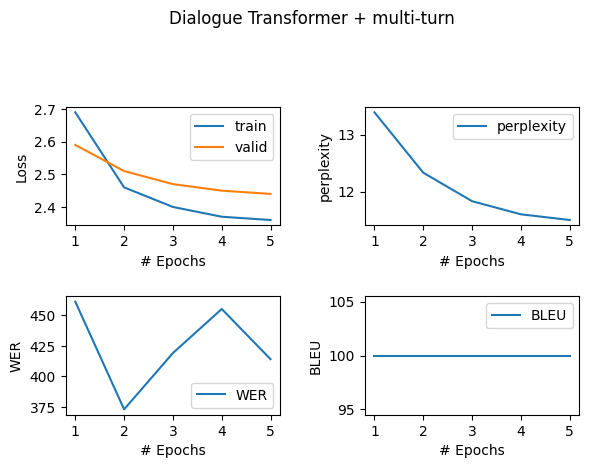

In [ ]:
log_file = 'results/DialogueTransformer/1986/train_log.txt'
model = 'Dialogue Transformer + multi-turn'
visualize_logs(log_file, model) 

## run the Baseline model on the multiturn dataset

In [ ]:
!python train_base_gru.py hparams_base_gru.yaml --number_of_epochs=15 --beam_size=3 --device='cuda:0' --data_folder="./"

Results: See Experiment7



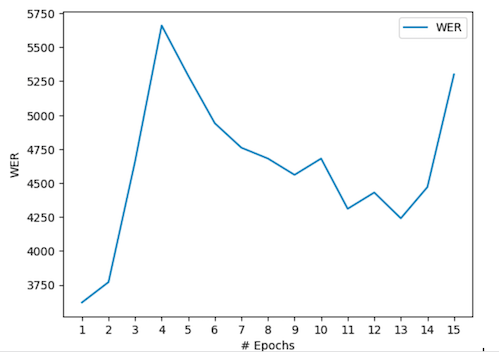

# 11.Conclusion

We can see that in the case of multi-turn dataset the models have more dificulties because the sequences are much longer. Overall, the Transformer-based dialogue model was able to generate reponses that are closer to the target. The LSTM-based models produced repetitive and more generic responses. Other articles [1, 6] report the same problem and suggest that this happening  because we are trying to maximize the log-likelihood of the response. They propose alternative objective functions to encourage the diversity of the responses. With the Transformer-based model we did not observed repetitive answers although we use the same objective function - NLL. The self-attention mechanism helped the model to understand better the context and generate more relevant reply.

The difficulties we faced when training the dialogues model:
- It is very time-consuming and compute-demanding task
- Significant data preparation was required
- Evaluation method is different than the usual evaluation methods

Due to memory and time constraints we trained the models with a very small subset of the training data - up to 100K records for the single-turn dataset and 50K records for the multi-turn dataset out of 1M records. However, we are impressed with the model’s ability to infer the underlying structure of the responses. In particular Transformer-based models generated replies that are close to the target.

In conclusion we can say that the dialogue generation problem is not as well understood as the machine translation problem. The attention mechanism used for alignment in machine translation may not be sufficient for the dialogue generation task. It seems this mechanism does not guide the decoder as well as in machine translation. The hierarchical neural networks and the hierarchical attention mechanism could be helpful.

In addition, as the authors suggest in [1], task-oriented dialogue models might require some external knowledge of the Ubuntu domain in addition to the knowledge that is present in the training corpus.

Finally, the evaluation metric that is usually applied in the Machine Translation task is not suitable for the dialogue generation task. Word embeddings group similar words together and could be used to better evaluate the similarity of the generated and the target response.


# 12.References

[1] - ubuntu  dataset   
Lowe, Ryan, Nissan Pow, Iulian Vlad Serban, Laurent Charlin, Chia-Wei Liu, and Joelle Pineau. "Training end-to-end dialogue systems with the ubuntu dialogue corpus." Dialogue & Discourse 8, no. 1 (2017): 31-65. 

[2] - ubuntu  dataset   
Lowe, Ryan, Nissan Pow, Iulian Serban, and Joelle Pineau. "The ubuntu dialogue corpus: A large dataset for research in unstructured multi-turn dialogue systems." arXiv preprint arXiv:1506.08909 (2015). 

[3] - MovieTriples dataset     
Serban, Iulian, Alessandro Sordoni, Yoshua Bengio, Aaron Courville, and Joelle Pineau. "Building end-to-end dialogue systems using generative hierarchical neural network models." In Proceedings of the AAAI conference on artificial intelligence, vol. 30, no. 1. 2016. 

[4] - ubuntu and twitter dataset 
Serban, Iulian, Alessandro Sordoni, Ryan Lowe, Laurent Charlin, Joelle Pineau, Aaron Courville, and Yoshua Bengio. "A hierarchical latent variable encoder-decoder model for generating dialogues." In Proceedings of the AAAI Conference on Artificial Intelligence, vol. 31, no. 1. 2017. 

[5] - ubuntu and twitter dataset  
Serban, Iulian, Tim Klinger, Gerald Tesauro, Kartik Talamadupula, Bowen Zhou, Yoshua Bengio, and Aaron Courville. "Multiresolution recurrent neural networks: An application to dialogue response generation." In Proceedings of the AAAI Conference on Artificial Intelligence, vol. 31, no. 1. 2017. 

 
[6] - MultiWoz dataset  
Parthasarathi, Prasanna, Mohamed Abdelsalam, Joelle Pineau, and Sarath Chandar. "A Brief Study on the Effects of Training Generative Dialogue Models with a Semantic loss." arXiv preprint arXiv:2106.10619 (2021). 

[7] - Reddit dataset  
Zhang, Yizhe, Siqi Sun, Michel Galley, Yen-Chun Chen, Chris Brockett, Xiang Gao, Jianfeng Gao, Jingjing Liu, and Bill Dolan. "Dialogpt: Large-scale generative pre-training for conversational response generation." arXiv preprint arXiv:1911.00536 (2019). 

[8] - multiple datasets  
Yeh, Yi-Ting, Maxine Eskenazi, and Shikib Mehri. "A comprehensive assessment of dialog evaluation metrics." arXiv preprint arXiv:2106.03706 (2021). 

[9]    
Liu, Chia-Wei, Ryan Lowe, Iulian V. Serban, Michael Noseworthy, Laurent Charlin, and Joelle Pineau. "How not to evaluate your dialogue system: An empirical study of unsupervised evaluation metrics for dialogue response generation." arXiv preprint arXiv:1603.08023 (2016). 

[10]   
Ryan Lowe*, Michael Noseworthy*, Iulian Serban, Nicholas Angelard-Gontier, Yoshua Bengio, Joelle Pineau. "Towards an Automatic Turing Test: Learning to Evaluate Dialogue Responses." 
In Association for Computational Linguistics (ACL), 2017. 

# 13.Acknowledgement

This work would not be possible without the help and the discussions with Professor Mirco Ravanelli and with Pooneh Mousavi and Pradnya Kandarkar 